<a href="https://colab.research.google.com/github/noviardhana/data_wizards/blob/master/clean_data_wizards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Widzards

Final Project Bootcamp Rakamin Data Science Batch 31

Dataset: **Should This Loan be Approved or Denied?**

Team:
1. Tegas Gagas Impian P. N. (Project Manager)
2. Aditya Sentanu MA
3. Andri Eka Putra
4. Apip Zanariyatim
5. Arras Amirah
6. Rehan Prasetyo
7. Wika Mirna Sari

## 1. Problem definition
We assume as a loan officer who is deciding whether to approve a loan to a small business. In this case, we predict the approval (**Approved** or **not approved**) based on the attributes.

## 2. Data
This dataset can be looked at this link: https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied

## 3. Features

Information about the description of features

**Create data dictionary:**
* LoanNr_ChkDgt = Identifier Primary key
* Name = Borrower name
* City = Borrower city
* State = Borrower state
* Zip	= Borrower zip code
* Bank = Bank name
* BankState = Bank state
* NAICS = North American industry classification system code
* ApprovalDate = Date SBA commitment issued
* ApprovalFY = Fiscal year of commitment
* Term = Loan term in months
* NoEmp = Number of business employees
* NewExist  -  1 = Existing business (0) , 2 = New business (1)
* CreateJob = Number of jobs created
* RetainedJob	= Number of jobs retained
* FranchiseCode =Franchise code, (00000 or 00001) = No * franchise
* UrbanRural - 1 = Urban, 2 = rural, 0 = undefined
* RevLineCr = Revolving line of credit: Y = Yes, N = No
* LowDoc = LowDoc Loan Program: Y = Yes, N = No
* ChgOffDate = The date when a loan is declared to be in * default
* DisbursementDate = Disbursement date
* DisbursementGross = Amount disbursed
* BalanceGross = Gross amount outstanding
* MIS_Status - Loan status charged off = CHGOFF (1) , Paid in full = PIF (0) (Target)
* ChgOffPrinGr = Charged-off amount
* GrAppv = Gross amount of loan approved by bank
* SBA_Appv = SBA’s guaranteed amount of approved loan

## 4. Evaluation

Evaluation metrics are:
* Accuracy (90%)
* ROC curve and AUC score
* Confusion matrix
* Precision
* Recall
* Classification report
* F1-score
* Cross-validation


## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro, normaltest, anderson, ttest_ind, f_oneway, kruskal, mannwhitneyu, chi2_contingency, skew, kurtosis, kendalltau
import scipy.stats as ss
from sklearn.feature_selection import f_classif, chi2, SelectKBest

sns.set_style('whitegrid')

## Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/0. Rakamin/Data Wizards/SBAnational.csv')

df = data.copy()

<ipython-input-3-7a19a462c5c4>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/0. Rakamin/Data Wizards/SBAnational.csv')


#Stage 1 - EDA

## Data analytic
1. Descriptive Statistics
2. Univariate Analysis
3. Multivariate Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [ ]:
df.shape

(899164, 27)

Here, we notice that there are 27 different columns, and there are 899164 entries in the dataframe.

In [ ]:
df.duplicated().any()

False

Here, we notice there is no duplicate data

In [ ]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

Here, we notice that there are significant number of null values in the dataframe, specifically the most in ChgOffDate column. Except for column ChgOffDate, we omitted the null value to make it easier to change the data type.

In [ ]:
df.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist','RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)

In [ ]:
df['ApprovalFY'].apply(type).value_counts()

<class 'int'>    759570
<class 'str'>    126670
Name: ApprovalFY, dtype: int64

Here, in case of ApprovalFY, we have two dtypes: str and int

We need to convert into int dtype, so we need to check which unique values in the column has str dtype.

In [ ]:
df.ApprovalFY.unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004', '1994',
       '1979', '1976', '1975', '1974', '1977', '1981', '1982', '1983',
       '1984', '1978', '1980', '1968', '1976A', '1969', '1995', '1970',
       '2005', '1996', '1971', 1996, 1971], dtype=object)

So, we notice that there are some rows which have the character 'A' along with the year.

In [ ]:
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x

df.ApprovalFY = df.ApprovalFY.apply(clean_str).astype('int16')

Here, we notice that several columns which need to have a specific dtype has object, which we will need to correct by setting them with their appropriate dtype.

In [ ]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

DisbursementGross BalanceGross ChgOffPrinGr        GrAppv      SBA_Appv
0       $60,000.00        $0.00        $0.00    $60,000.00    $48,000.00 
1       $40,000.00        $0.00        $0.00    $40,000.00    $32,000.00 
2      $287,000.00        $0.00        $0.00   $287,000.00   $215,250.00 
3       $35,000.00        $0.00        $0.00    $35,000.00    $28,000.00 
4      $229,000.00        $0.00        $0.00   $229,000.00   $229,000.00

Here, we notice that the issue is because of the dollar symbol, because of which converts the int dtype column to object.

So we remove the symbol and convert the dtype of these columns.

In [ ]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = \
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))

In [ ]:
# Convert ApprovalDate and DisbursementDate columns to datetime values
# ChgOffDate not changed to datetime since it is not of value and will be removed later
df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

In [ ]:
df = df.astype({'Zip': 'str', 'NewExist': 'int8', 'UrbanRural': 'int8', 'DisbursementGross': 'float', 'BalanceGross': 'float',
                          'ChgOffPrinGr': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

In [ ]:
df.dtypes

LoanNr_ChkDgt                 int64
Name                         object
City                         object
State                        object
Zip                          object
Bank                         object
BankState                    object
NAICS                         int64
ApprovalDate         datetime64[ns]
ApprovalFY                    int16
Term                          int64
NoEmp                         int64
NewExist                       int8
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                     int8
RevLineCr                    object
LowDoc                       object
ChgOffDate                   object
DisbursementDate     datetime64[ns]
DisbursementGross           float64
BalanceGross                float64
MIS_Status                   object
ChgOffPrinGr                float64
GrAppv                      float64
SBA_Appv                    float64
dtype: object

In [ ]:
df.shape

(886240, 27)

In [ ]:
df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])

Here, according the file that was provided along with the dataset, we map the industry code with the industry name.

In [ ]:
df['Industry'] = df['Industry'].map({
    '11': 'Agriculture / Forestry / Fishing / Hunting',
    '21': 'Mining / Quarrying / Oil&Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale trade',
    '44': 'Retail trade',
    '45': 'Retail trade',
    '48': 'Transportation / Warehousing',
    '49': 'Transportation / Warehousing',
    '51': 'Information',
    '52': 'Finance / Insurance',
    '53': 'Real Estate / Rental / Leasing',
    '54': 'Proffesional / Scientific / Tech.Service',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative & Support / Waste Management / Remediation Services',
    '61': 'Educational',
    '62': 'Health Care / Social Assistance',
    '71': 'Arts / Entertainment / Recreation',
    '72': 'Accomodation / Food Services',
    '81': 'Other Services (except public admin)',
    '92': 'Public Administration'
})

df.dropna(subset=['Industry'], inplace=True)

Unknown industrial fields will be omitted to avoid errors in data interpretation

In [ ]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           544089
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
Industry                  0
dtype: int64

In [ ]:
df.shape

(687973, 28)

In [ ]:
# MIS_Status
# Make Default target field based on MIS_Status where P I F = 0 and CHGOFF = 1 so we can see what features are prevalant in a defaulted loan
df['Default'] = np.where(df['MIS_Status'] == 'P I F', 0, 1)
df['Default'].value_counts()

0    548445
1    139528
Name: Default, dtype: int64

In [ ]:
df.describe(include='number')

LoanNr_ChkDgt          NAICS     ApprovalFY           Term  \
count   6.879730e+05  687973.000000  687973.000000  687973.000000   
mean    4.658286e+09  514312.243358    2003.011929     102.988891   
std     2.465154e+09  173404.761522       4.923048      74.786130   
min     1.000014e+09  111110.000000    1984.000000       0.000000   
25%     2.531175e+09  423430.000000    2001.000000      60.000000   
50%     4.302675e+09  512110.000000    2004.000000      84.000000   
75%     6.634744e+09  621399.000000    2006.000000     120.000000   
max     9.995613e+09  928120.000000    2014.000000     569.000000   

               NoEmp      NewExist      CreateJob    RetainedJob  \
count  687973.000000  687973.00000  687973.000000  687973.000000   
mean        9.865663       1.27603       2.172312       5.125434   
std        61.547739       0.44939      14.946943      20.727148   
min         0.000000       0.00000       0.000000       0.000000   
25%         2.000000       1.00000       0.000000       0.000000   
50%         4.000000       1.00000       0.000000       1.000000   
75%         9.000000       2.00000       2.000000       5.000000   
max      9999.000000       2.00000    5621.000000    9500.000000   

       FranchiseCode     UrbanRural  DisbursementGross   BalanceGross  \
count  687973.000000  687973.000000       6.879730e+05  687973.000000   
mean     2434.855442       0.940198       1.948029e+05       3.907007   
std     12049.580431       0.590055       2.965355e+05    1648.722510   
min         0.000000       0.000000       4.000000e+03       0.000000   
25%         0.000000       1.000000       3.660000e+04       0.000000   
50%         1.000000       1.000000       9.000000e+04       0.000000   
75%         1.000000       1.000000       2.174590e+05       0.000000   
max     99999.000000       2.000000       1.144632e+07  996262.000000   

       ChgOffPrinGr        GrAppv      SBA_Appv        Default  
count  6.879730e+05  6.879730e+05  6.879730e+05  687973.000000  
mean   1.473227e+04  1.830735e+05  1.403683e+05       0.202810  
std    6.820150e+04  2.900333e+05  2.366003e+05       0.402093  
min    0.000000e+00  1.000000e+03  5.000000e+02       0.000000  
25%    0.000000e+00  3.000000e+04  1.700000e+04       0.000000  
50%    0.000000e+00  7.500000e+04  5.000000e+04       0.000000  
75%    0.000000e+00  2.000000e+05  1.500000e+05       0.000000  
max    3.512596e+06  5.000000e+06  4.500000e+06       1.000000

In [ ]:
df.describe(include='object')

Name         City   State     Zip                        Bank  \
count   687973       687973  687973  687973                      687973   
unique  604799        28636      51   30451                        5212   
top     SUBWAY  LOS ANGELES      CA   90015  BANK OF AMERICA NATL ASSOC   
freq       910         9686  101037     810                       74596   

       BankState RevLineCr  LowDoc ChgOffDate MIS_Status      Industry  
count     687973    687973  687973     143884     687973        687973  
unique        55        14       8       4978          2            20  
top           CA         N       N  13-Mar-10      P I F  Retail trade  
freq       93939    267256  619435        726     548445        125762

## Business Insight

Top Bank, BankState, City, Industry

In [ ]:
df.Bank.value_counts().head(20).reset_index()

index   Bank
0       BANK OF AMERICA NATL ASSOC  74596
1      WELLS FARGO BANK NATL ASSOC  42841
2   JPMORGAN CHASE BANK NATL ASSOC  40597
3         CITIZENS BANK NATL ASSOC  32067
4   U.S. BANK NATIONAL ASSOCIATION  27045
5                        BBCN BANK  22411
6   PNC BANK, NATIONAL ASSOCIATION  22153
7           CAPITAL ONE NATL ASSOC  21758
8    MANUFACTURERS & TRADERS TR CO   8551
9            READYCAP LENDING, LLC   8178
10    THE HUNTINGTON NATIONAL BANK   7457
11       ZIONS FIRST NATIONAL BANK   7013
12   TD BANK, NATIONAL ASSOCIATION   6699
13     BANCO POPULAR NORTH AMERICA   6367
14         CALIFORNIA BANK & TRUST   6336
15    KEYBANK NATIONAL ASSOCIATION   5991
16                  CITIBANK, N.A.   5968
17              BRANCH BK. & TR CO   5420
18       BUSINESS LOAN CENTER, LLC   5254
19                   COMERICA BANK   5091

In [ ]:
df.State.value_counts().head(20).reset_index()

index   State
0     CA  101037
1     TX   52009
2     NY   45375
3     FL   34193
4     PA   28388
5     OH   25107
6     IL   23438
7     MA   20230
8     NJ   19571
9     MN   18530
10    WA   17174
11    GA   16979
12    MI   16675
13    CO   15765
14    WI   15619
15    UT   15387
16    MO   14339
17    AZ   14084
18    IN   11409
19    NC   10802

In [ ]:
df.Industry.value_counts().reset_index()

index  Industry
0                                        Retail trade    125762
1                Other Services (except public admin)     71754
2                                       Manufacturing     67109
3                        Accomodation / Food Services     67084
4            Proffesional / Scientific / Tech.Service     66951
5                                        Construction     65635
6                     Health Care / Social Assistance     54633
7                                     Wholesale trade     48148
8   Administrative & Support / Waste Management / ...     32114
9                        Transportation / Warehousing     22135
10                  Arts / Entertainment / Recreation     14460
11                     Real Estate / Rental / Leasing     13457
12                                        Information     11220
13                                Finance / Insurance      9378
14         Agriculture / Forestry / Fishing / Hunting      8868
15                                        Educational      6313
16            Mining / Quarrying / Oil&Gas Extraction      1820
17                                          Utilities       654
18            Management of Companies and Enterprises       256
19                              Public Administration       222

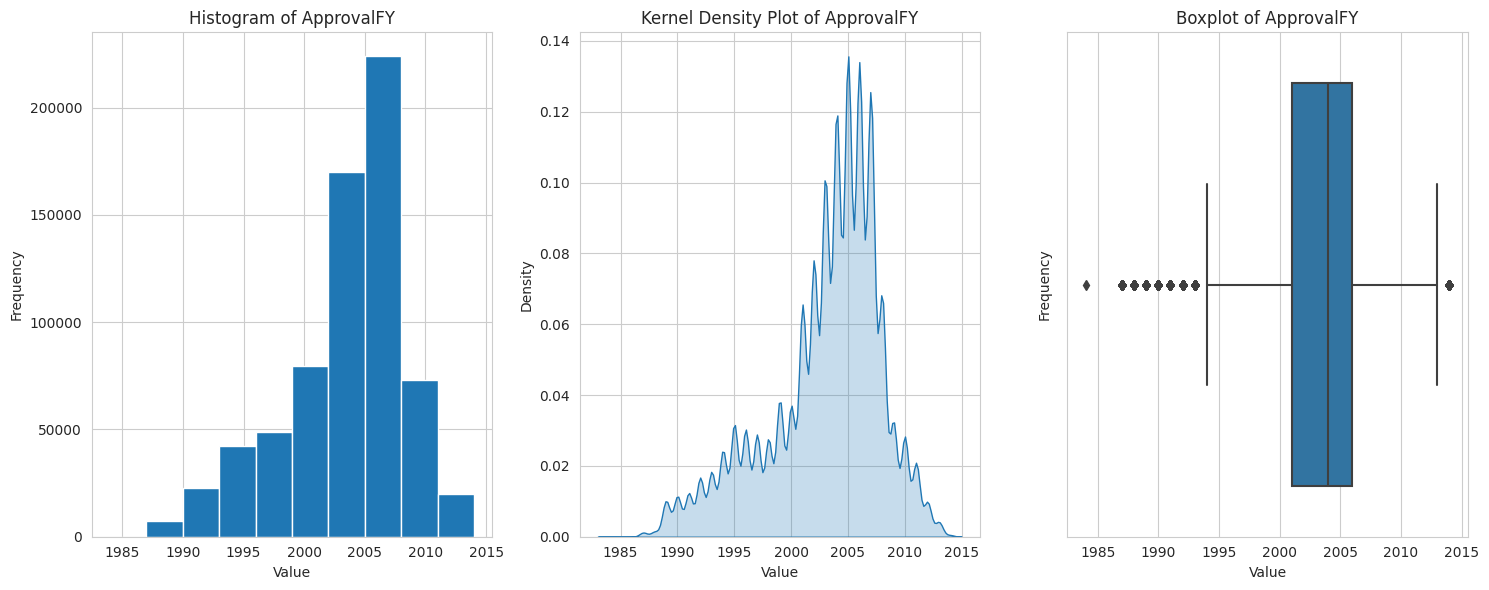

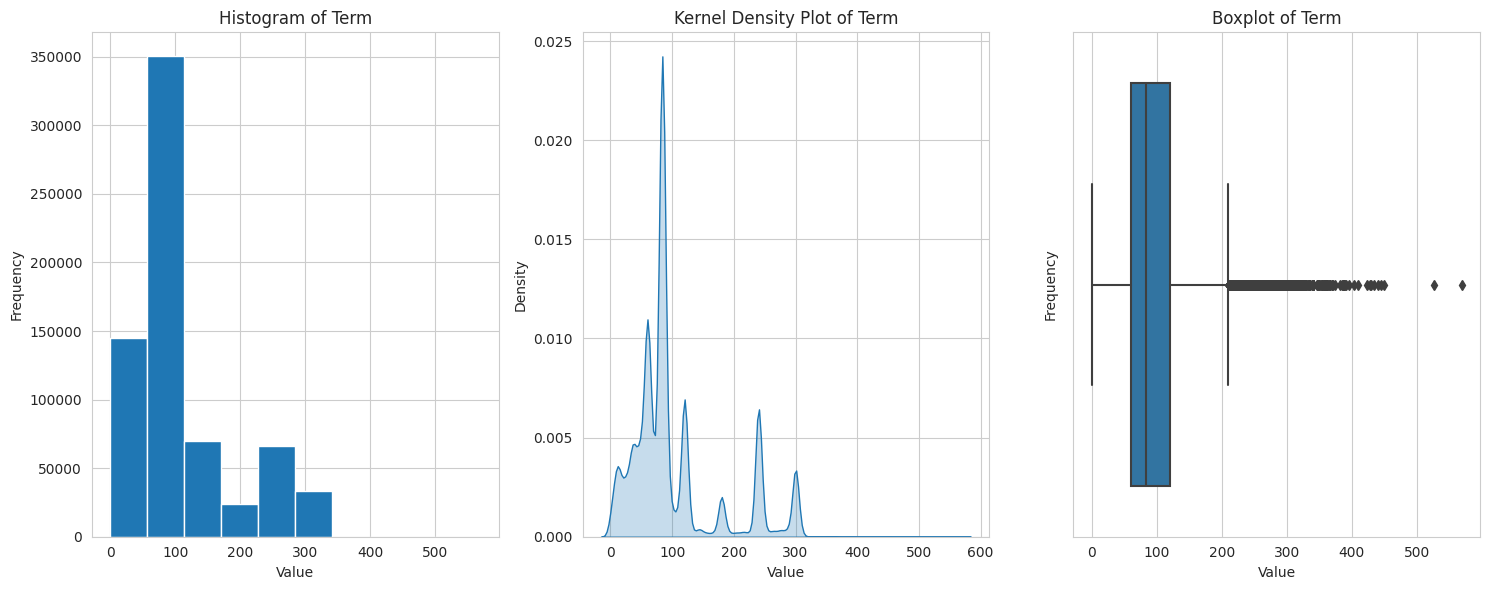

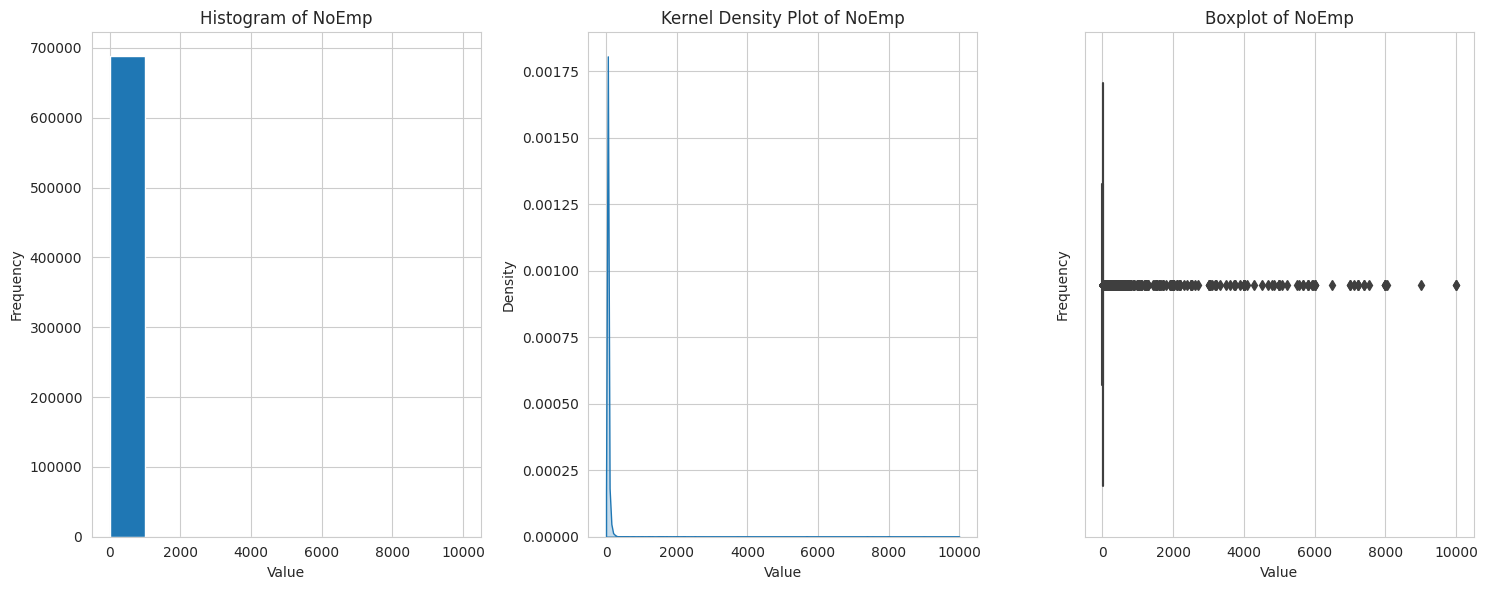

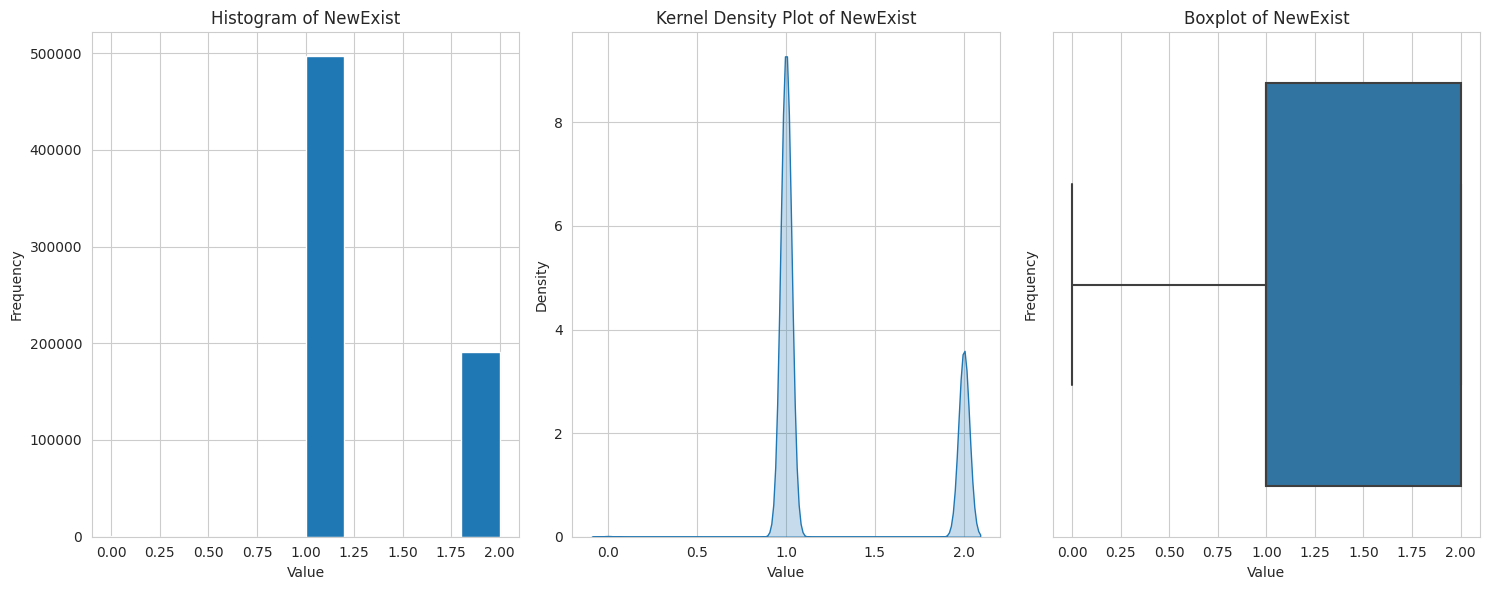

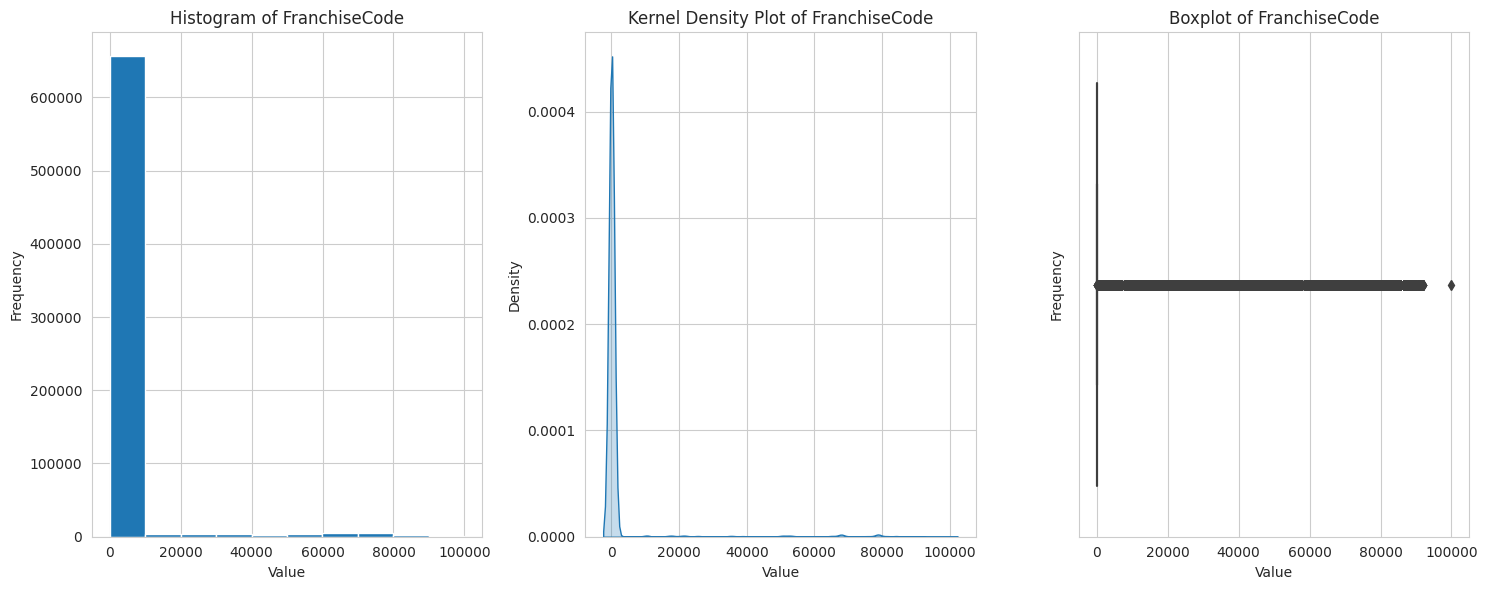

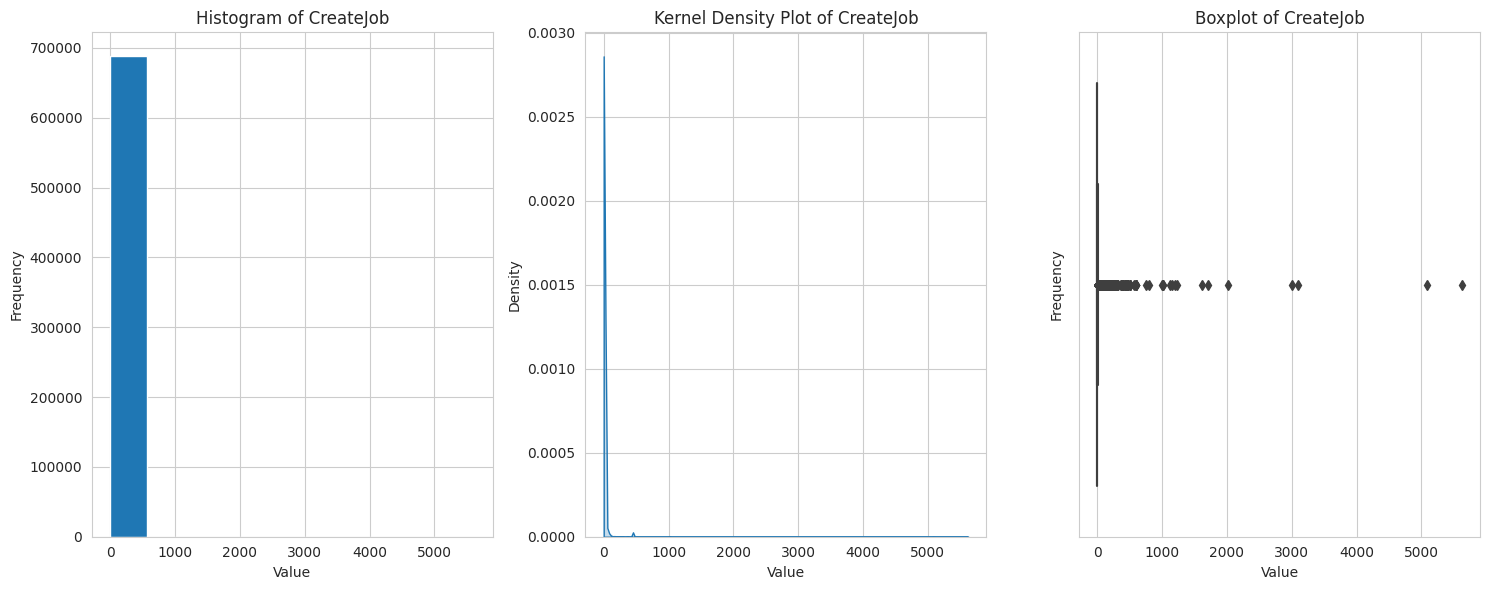

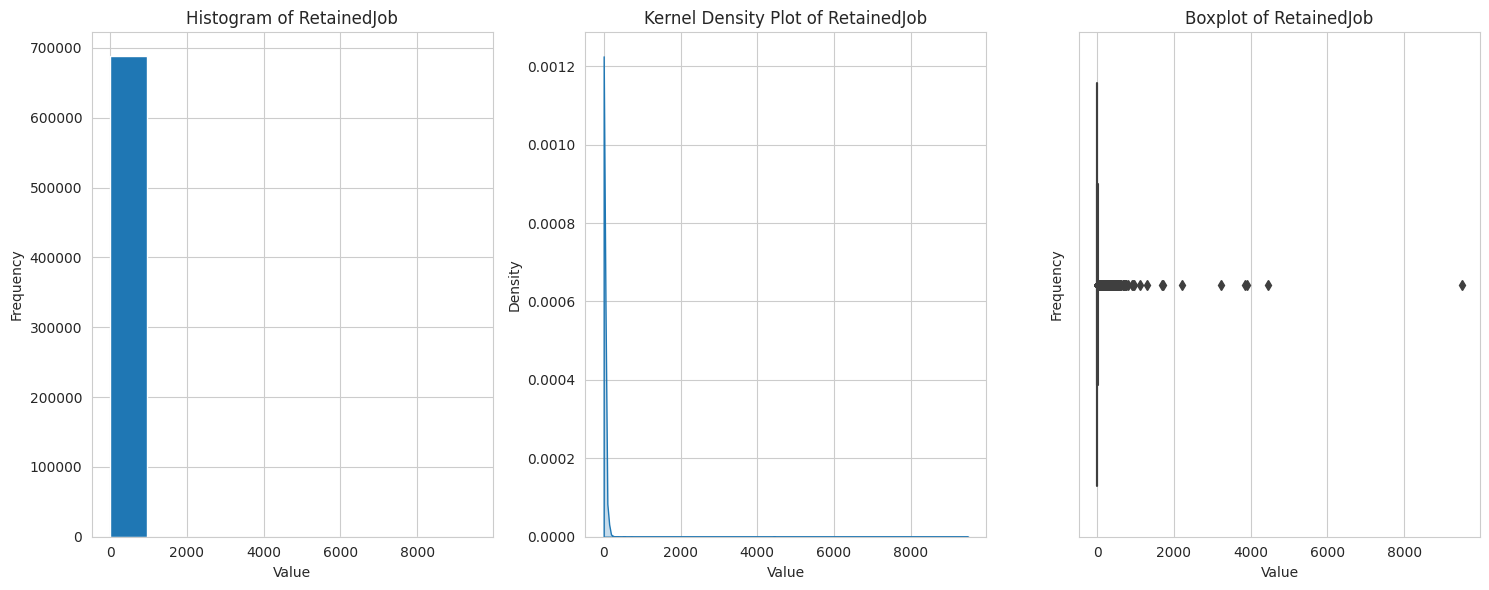

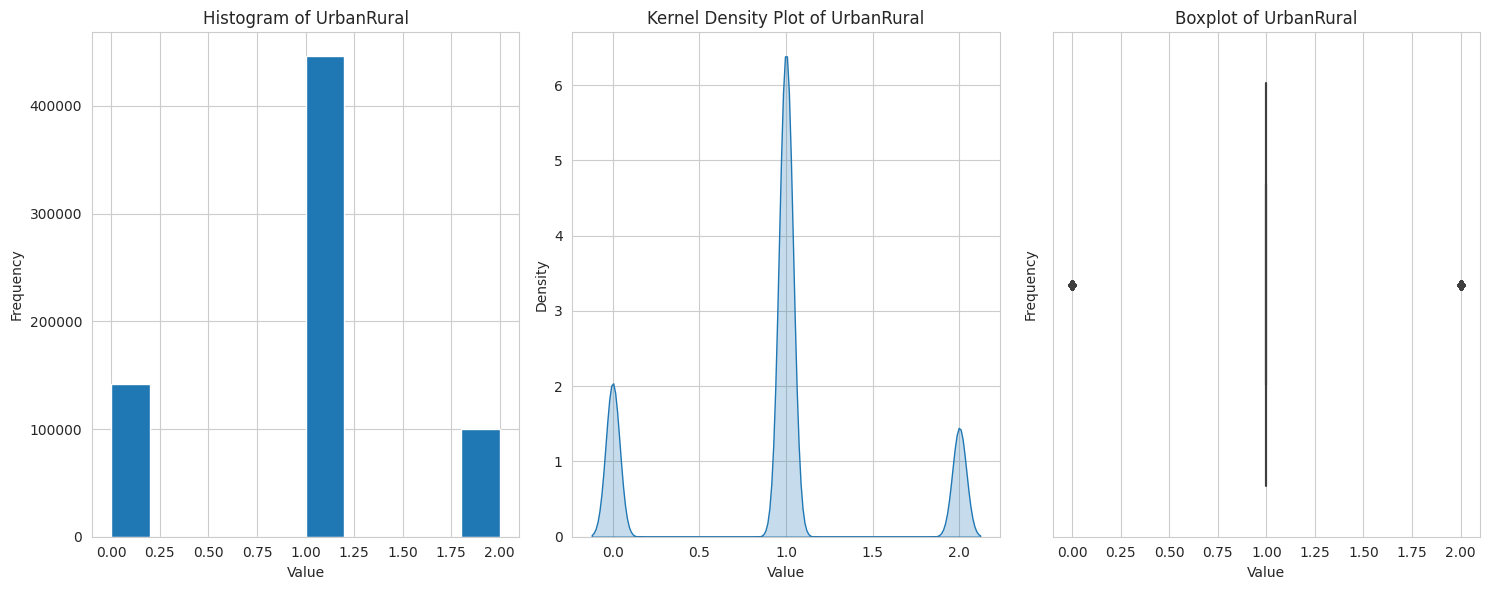

In [ ]:
df_num = df[['ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'FranchiseCode', 'CreateJob', 'RetainedJob', 'UrbanRural']]

# Assuming your DataFrame is named 'df'
for col in df_num.columns:
    # Create a figure with three subplots
    fig, ax = plt.subplots(1, 3, figsize=(15, 6))

    # Histogram
    ax[0].hist(df_num[col], bins=10)
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Frequency')
    ax[0].set_title('Histogram of {}'.format(col))

    # Kernel Density Plot
    sns.kdeplot(df_num[col], ax=ax[1], fill = True)
    ax[1].set_xlabel('Value')
    ax[1].set_ylabel('Density')
    ax[1].set_title('Kernel Density Plot of {}'.format(col))

    # Boxplot
    sns.boxplot(x = df_num[col], ax=ax[2])
    ax[2].set_xlabel('Value')
    ax[2].set_ylabel('Frequency')
    ax[2].set_title('Boxplot of {}'.format(col))

    # Show the plots
    plt.tight_layout()
    plt.show()

Some Insight:
1. In the **Approval data**, many banks approved projects in 2000 and reached their highest number at the end of 2000. For years under 1980, very few received approval.
2. In the **TERM table**, there is a Positive Skewed. The number of customers who make loans during the (Modus) period of 78 months or 6.5 years. For the long term (Max) is 569 months or 47 years. But based on the boxplot data, for loan terms of more than 200 months or 16 years, the data is considered skewed.
3. In the **NoEMP** dataset, Skew's distribution is highly to the right, meaning that most of the businesses that get loans have a relatively small number of employees.
Slanted to the right allows indication there is a maximum of 9999 employees. However, this value is considered an outlier because this value is far from the third quartile value (75%).
Having a minimum value of 0 on NoEMP can indicate that there are businesses/businesses financed by this loan, namely small businesses without permanent employees or businesses/businesses that have just been established.
4. The data for **NewExist** is skewed (positif skewed). This is because there are only 2 categories of data in the table which are existing businesses/businesses and newly created businesses/businesses.
5. The **CreateJob** data here has an average of 8.46 with a std (standard deviation) of 237.30. So the distribution in the plot here is very skewed to the right, for a median value of 0 and a third quartile value (75%) of 1. In addition, the CreateJob column also has a minimum value of 0 and a maximum value of 8000. So there are very significant outlier values. This value can indicate the opening of new businesses to absorb labor.
6. For data on **RetainedJob**: Skew very to the right, this is because the min value is 0. which means that the employer cannot hold a job after obtaining a loan. And the max value here is also as much as 9500. The max or maximum value is much greater than the 3rd quartile value (75%), this makes the outliers very large.


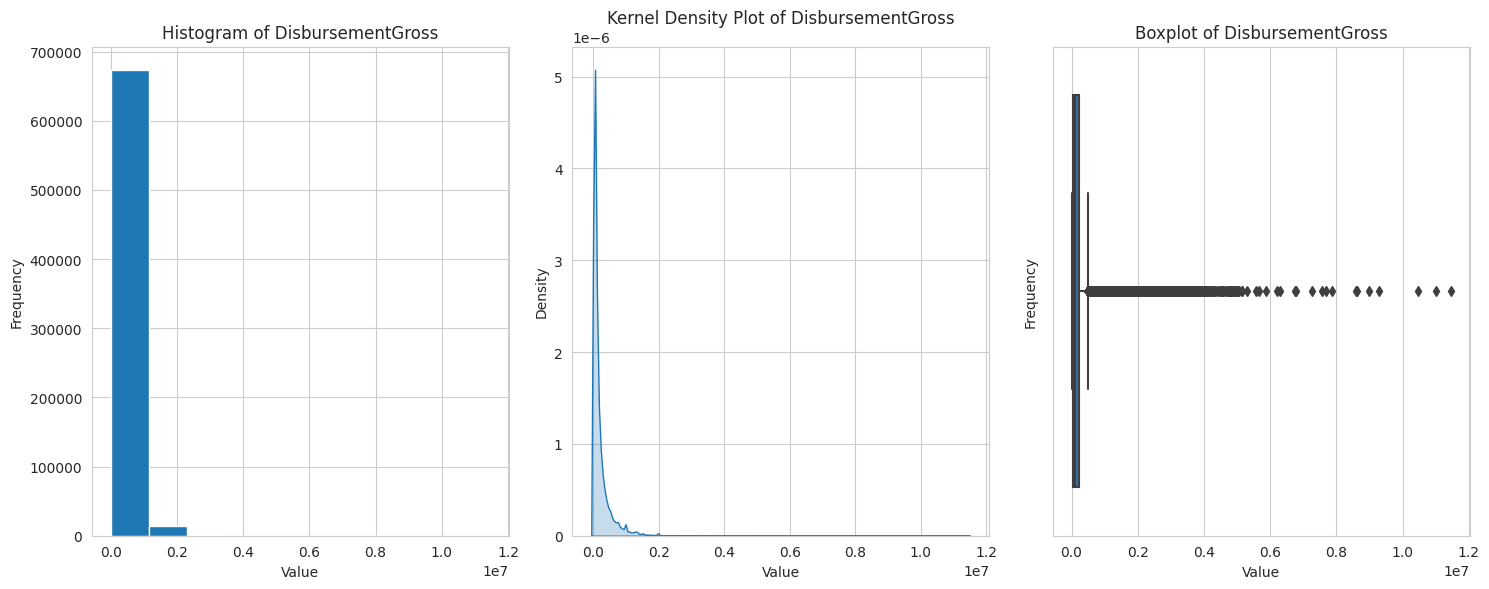

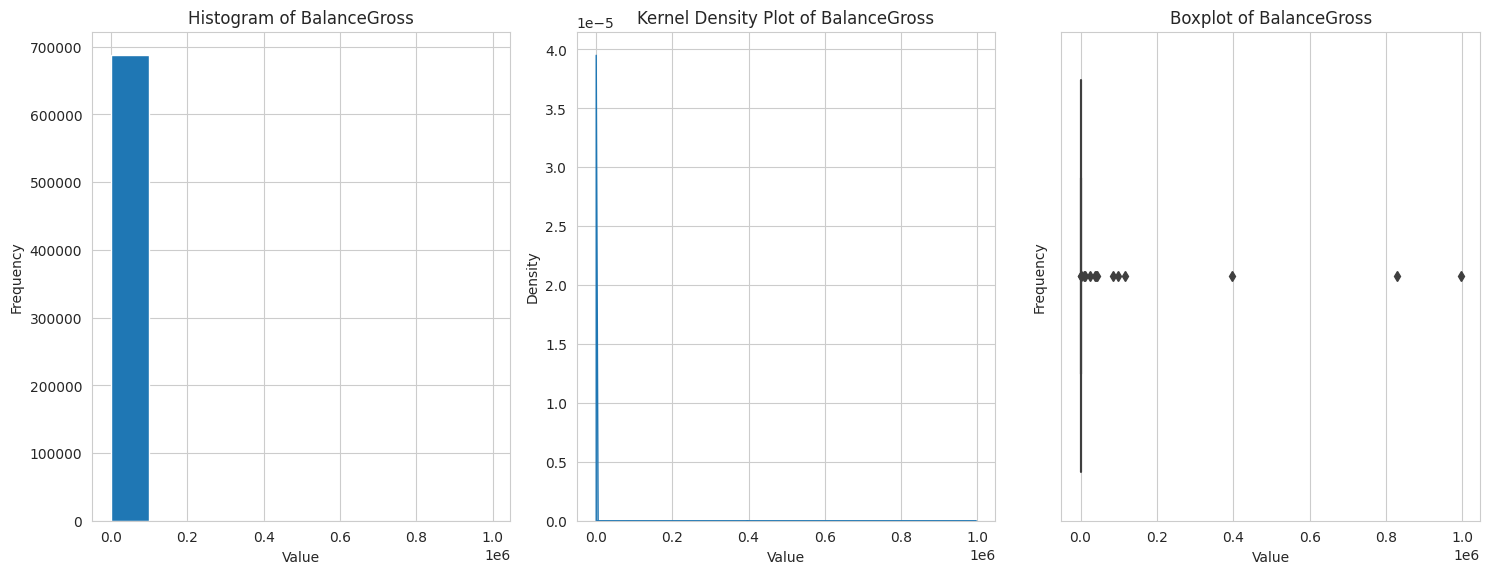

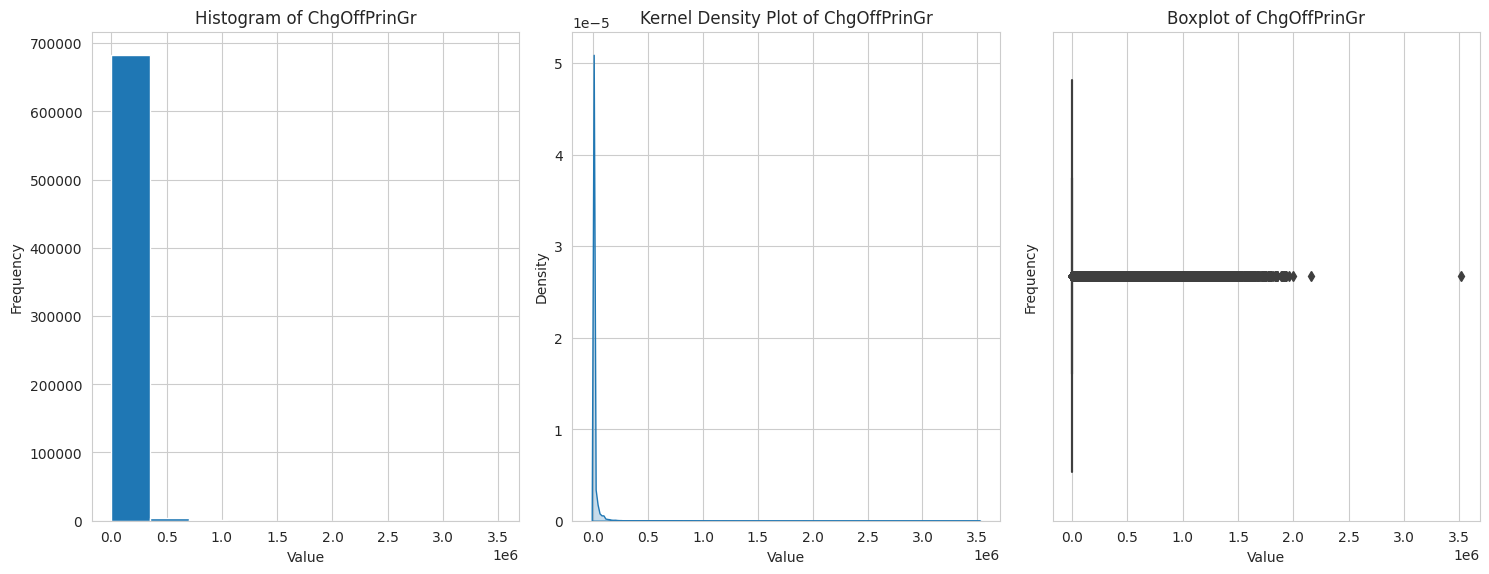

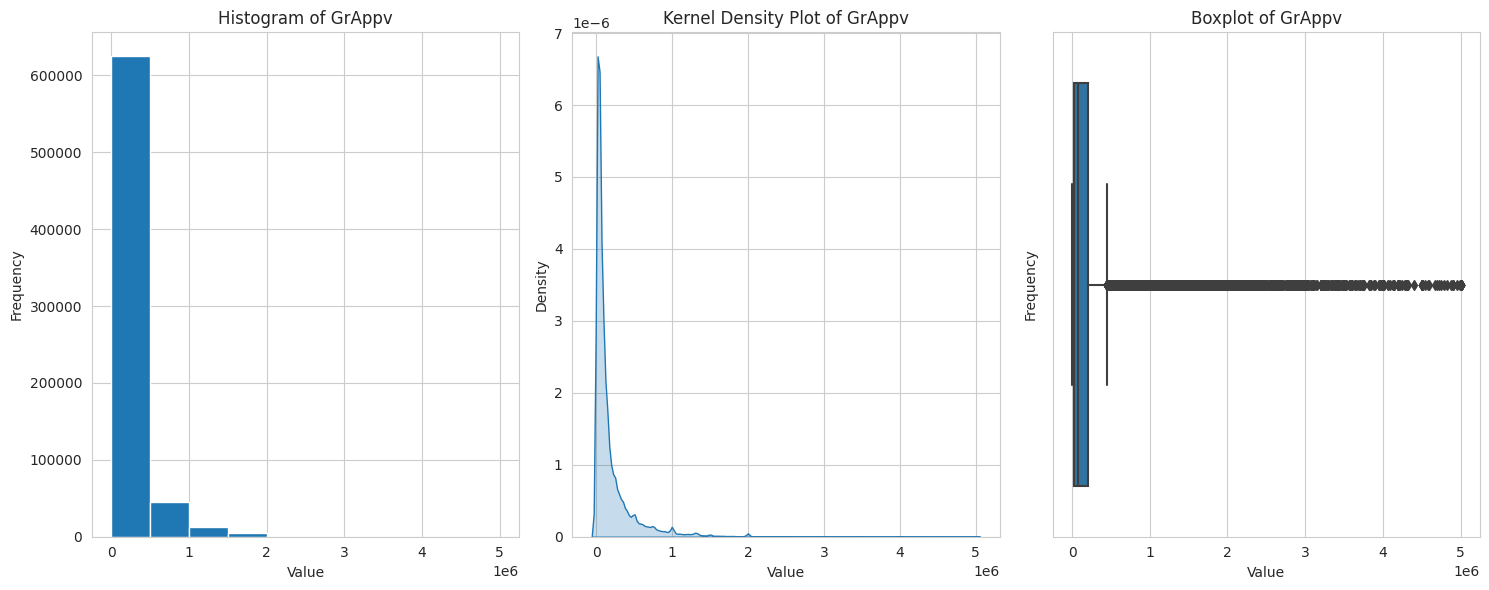

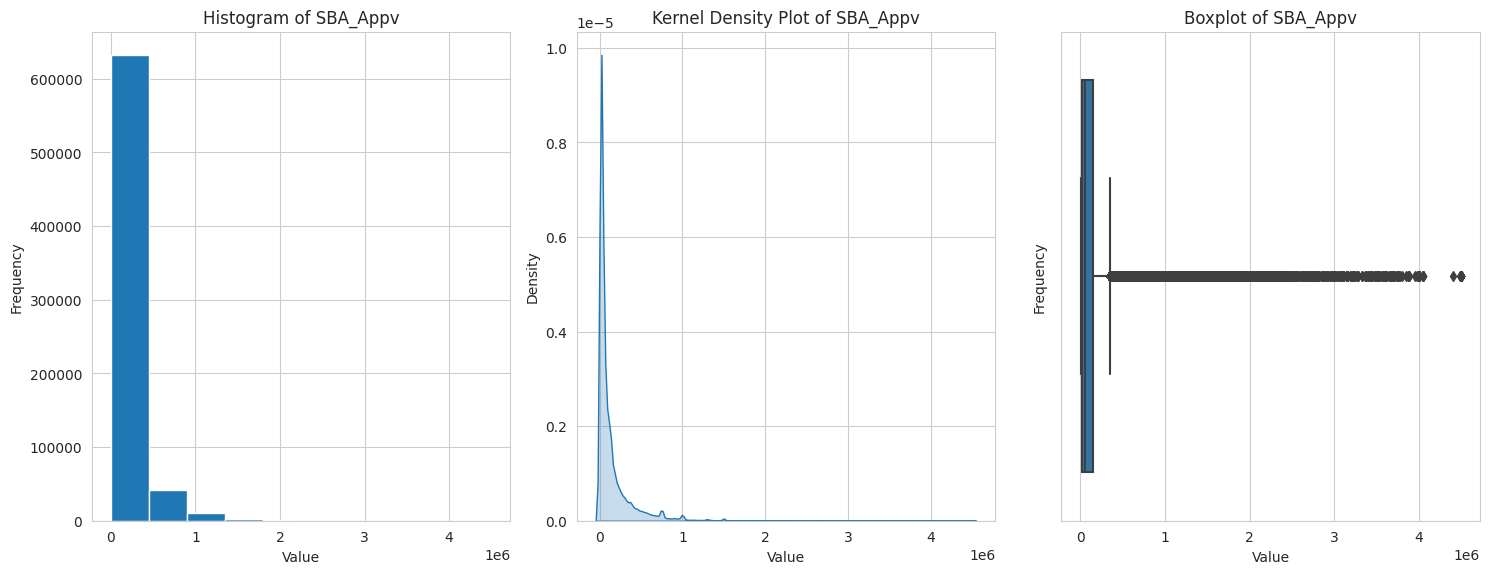

In [ ]:
df_num = df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']]

# Assuming your DataFrame is named 'df'
for col in df_num.columns:
    # Create a figure with three subplots
    fig, ax = plt.subplots(1, 3, figsize=(15, 6))

    # Histogram
    ax[0].hist(df_num[col], bins=10)
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Frequency')
    ax[0].set_title('Histogram of {}'.format(col))

    # Kernel Density Plot
    sns.kdeplot(df_num[col], ax=ax[1], fill = True)
    ax[1].set_xlabel('Value')
    ax[1].set_ylabel('Density')
    ax[1].set_title('Kernel Density Plot of {}'.format(col))

    # Boxplot
    sns.boxplot(x = df_num[col], ax=ax[2])
    ax[2].set_xlabel('Value')
    ax[2].set_ylabel('Frequency')
    ax[2].set_title('Boxplot of {}'.format(col))

    # Show the plots
    plt.tight_layout()
    plt.show()

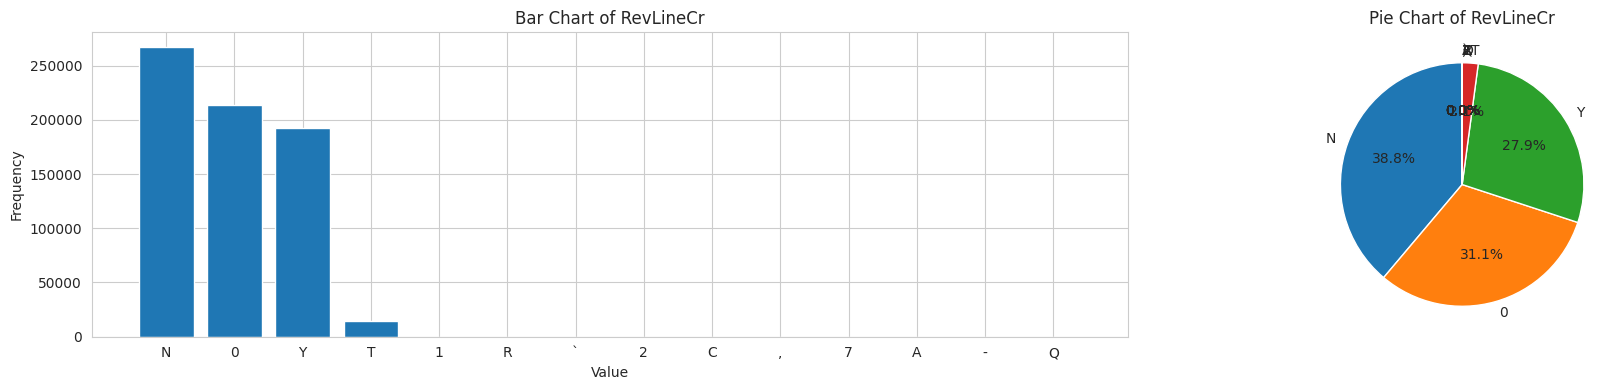

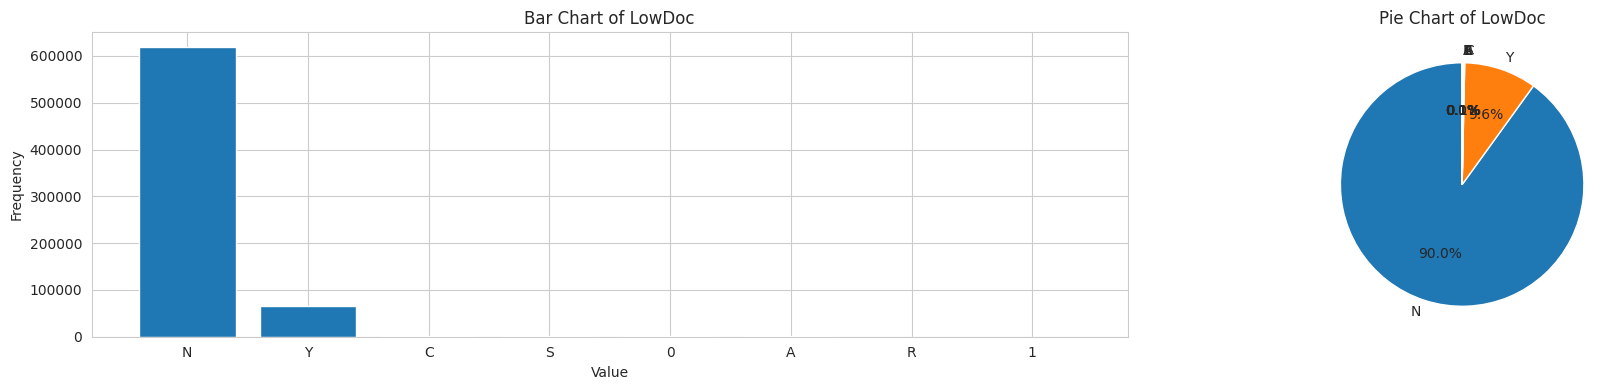

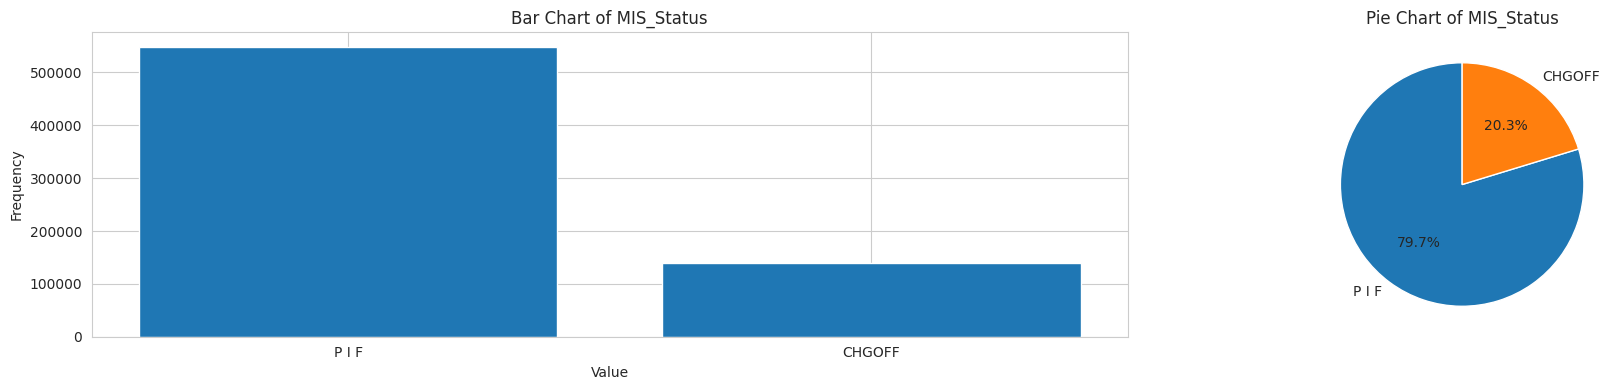

In [ ]:
df_obj = df[['RevLineCr',	'LowDoc', 'MIS_Status']]

# Assuming your DataFrame is named 'df'
for col in df_obj.columns:
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(20, 4))

    # Bar Chart
    counts = df_obj[col].value_counts()
    ax[0].bar(counts.index, counts.values)
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Frequency')
    ax[0].set_title('Bar Chart of {}'.format(col))

    # Pie Chart
    proportions = df_obj[col].value_counts(normalize=True)
    ax[1].pie(proportions.values, labels=proportions.index, autopct='%1.1f%%', startangle=90)
    ax[1].set_title('Pie Chart of {}'.format(col))

    # Show the plots
    plt.tight_layout()
    plt.show()

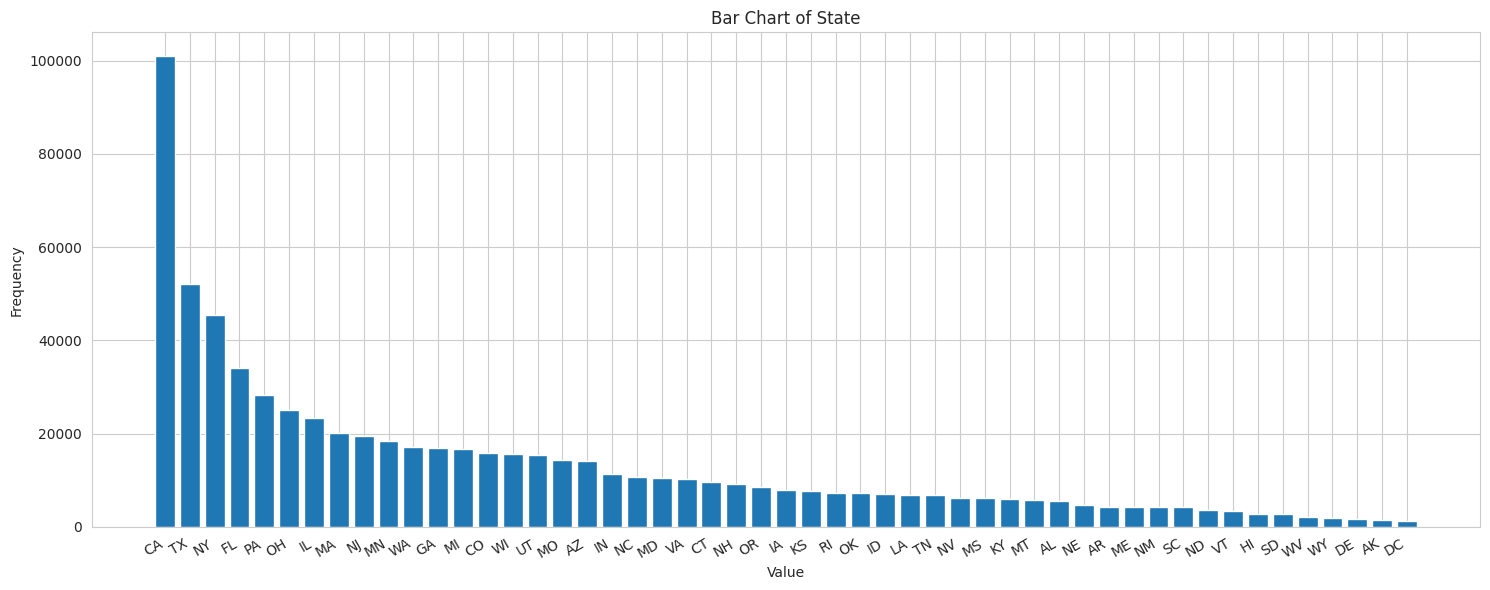

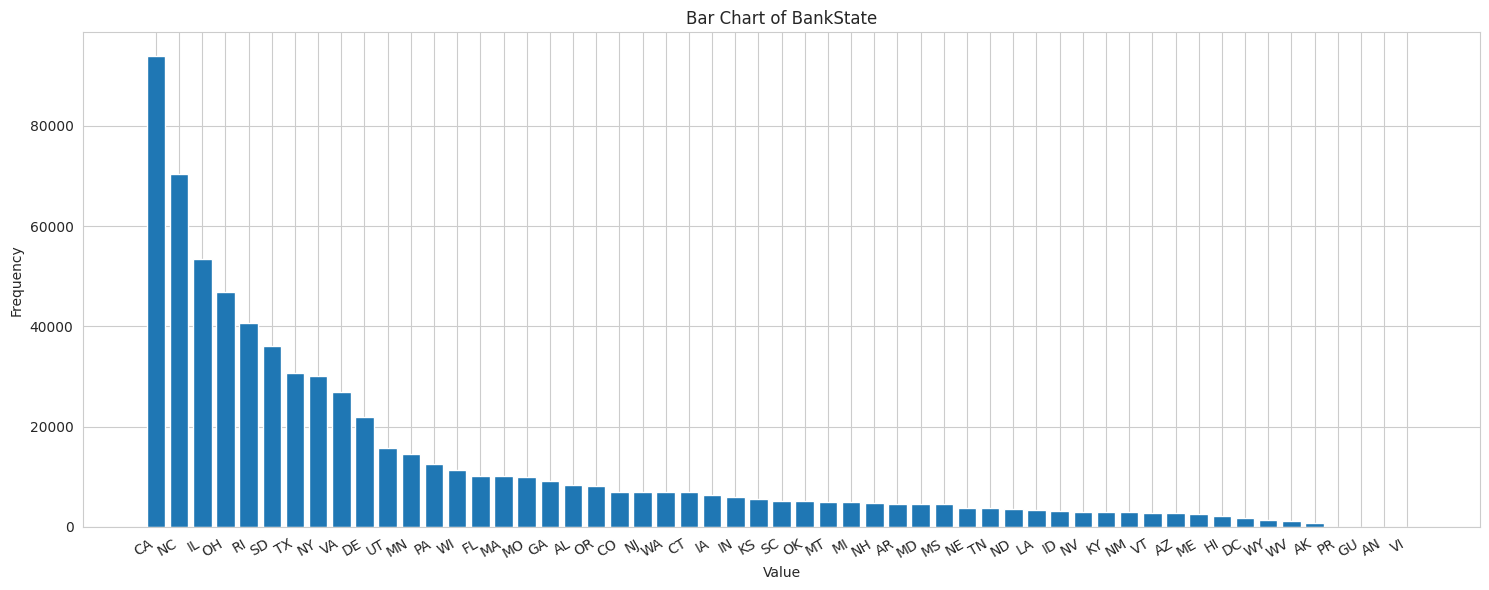

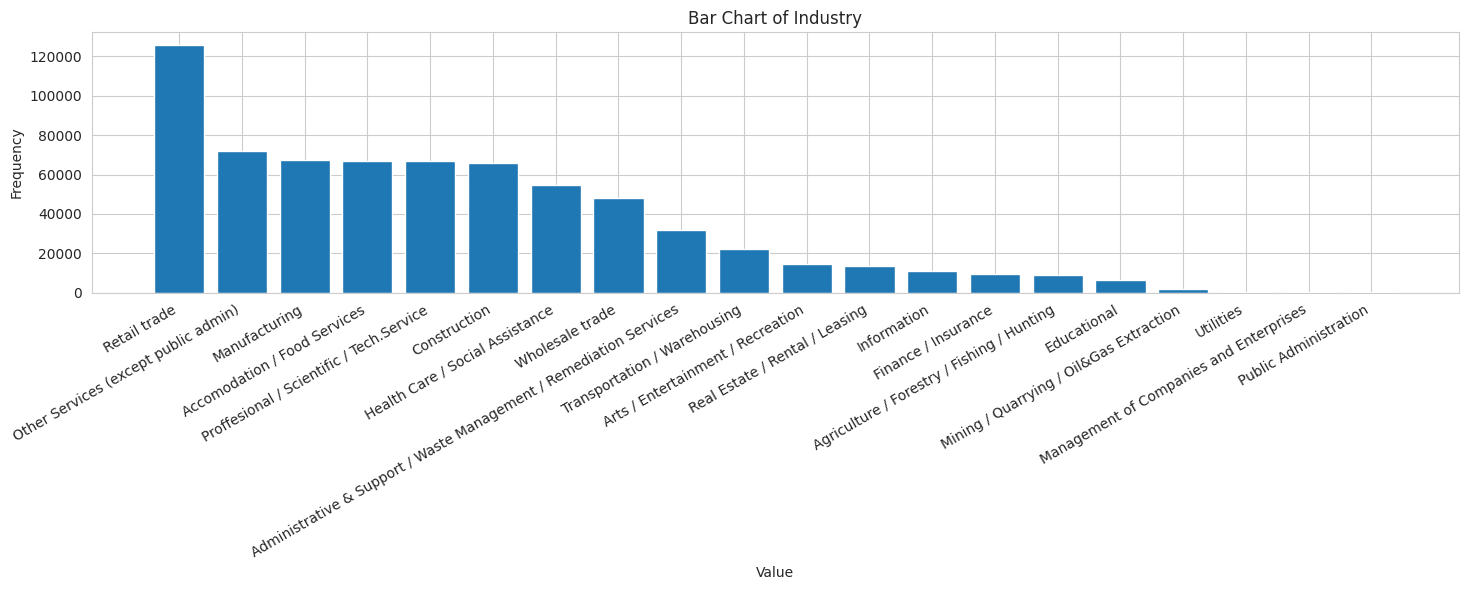

In [ ]:
df_obj = df[['State',	'BankState', 'Industry']]

# Assuming your DataFrame is named 'df'
for col in df_obj.columns:
    # Create a figure with onlyone plots
    fig, ax = plt.subplots(1, 1, figsize=(15, 6))

    # Bar Chart
    counts = df_obj[col].value_counts()
    ax.bar(counts.index, counts.values)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title('Bar Chart of {}'.format(col))

    # Show the plots
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()


<ipython-input-32-31e50222c43b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype= bool))
<ipython-input-32-31e50222c43b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), cmap='YlGnBu', mask=mask, annot=True, fmt='.2f')


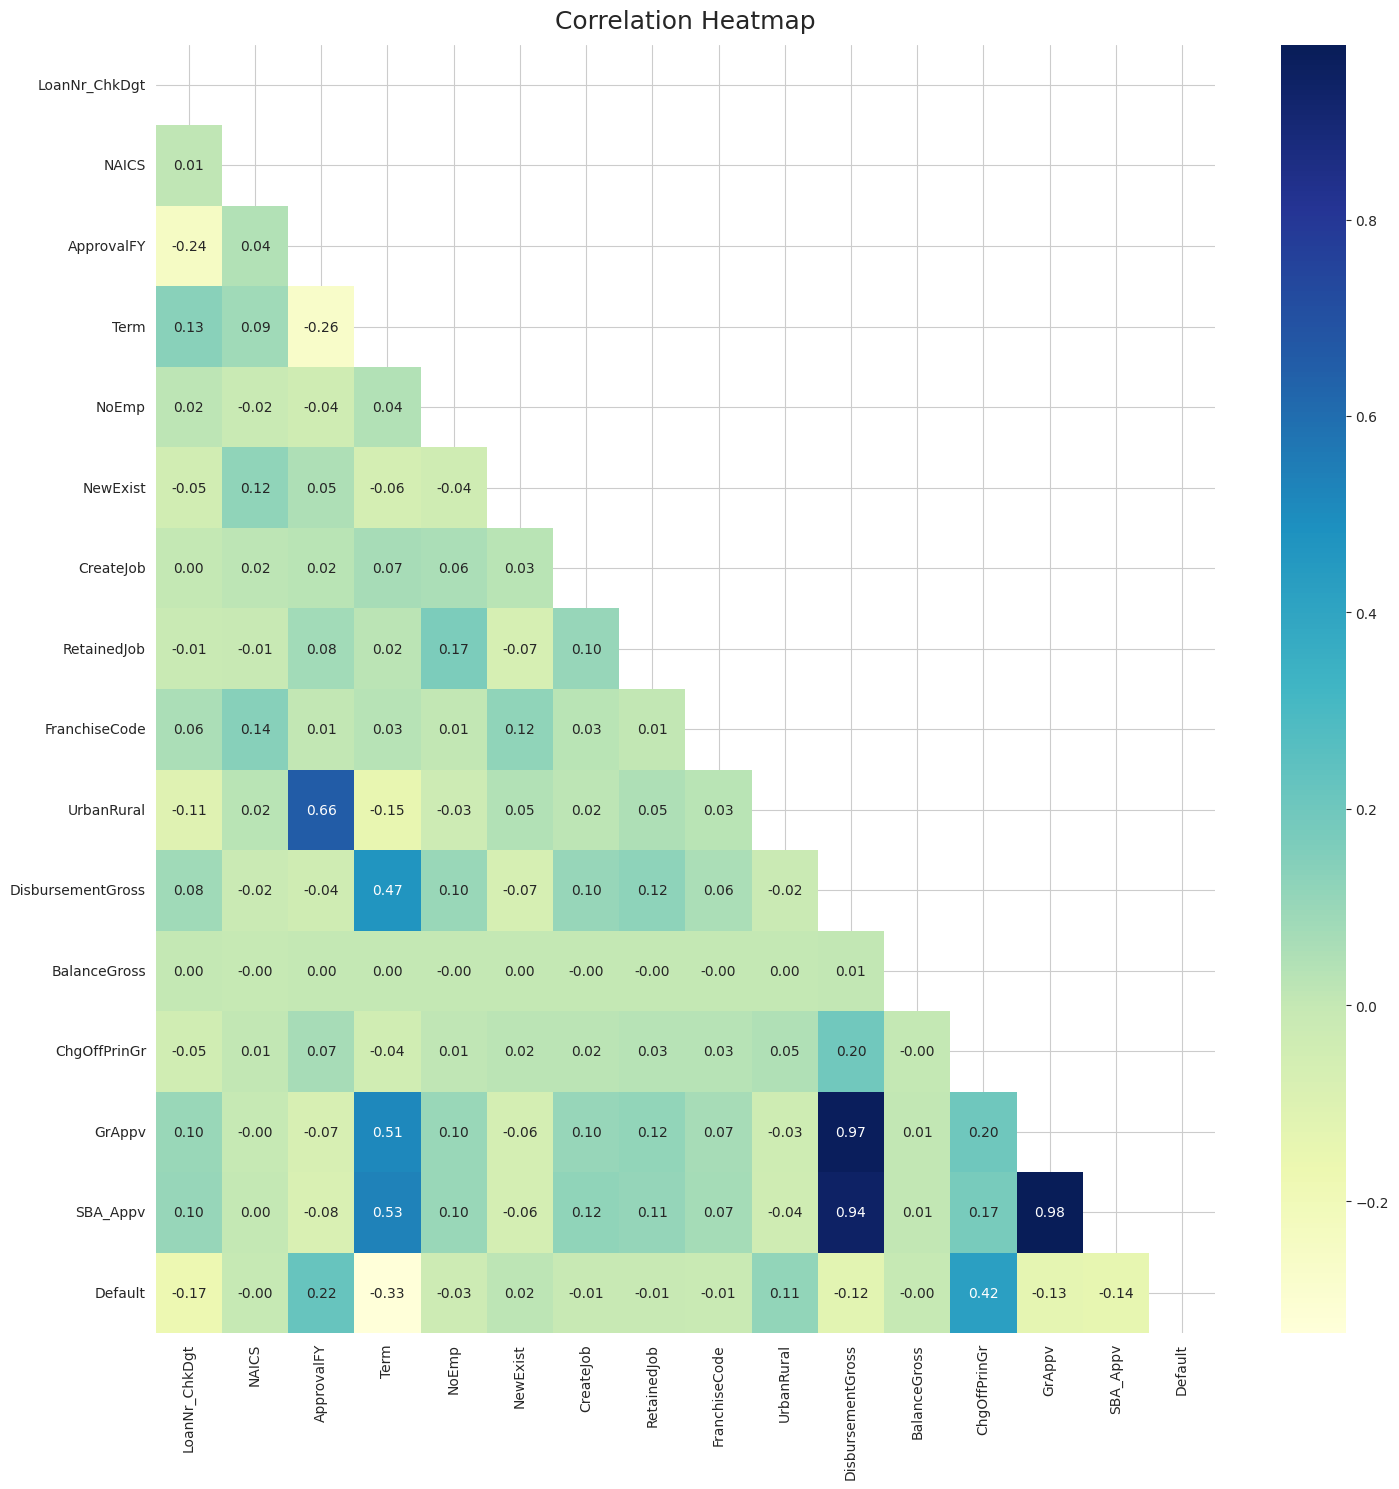

In [ ]:
plt.figure(figsize=(15, 15))

mask = np.triu(np.ones_like(df.corr(), dtype= bool))
heatmap = sns.heatmap(df.corr(), cmap='YlGnBu', mask=mask, annot=True, fmt='.2f')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

**Positive correlation**:
There is a positive correlation between GrApprv, SBA_Appv, and DisbursementGross, which means that the number of loans submitted is close to the amount of loans disbursed. What needs to be done from these results is to re-check, so that only one variable can be selected in the modeling because the variants of the three variables are mutually represented.

There is a strong correlation between RetainedJob and CreatedJob which indicates workers can keep their jobs.

**Negative Correlation**:
There is a negative correlation between Term and Default, meaning we have to assume that the majority of borrowers with longer repayment terms are unable to make payments.

## Feature Selection ANOVA

In [ ]:
# split dataset into features (X) and target (y)
X = df[['ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'FranchiseCode', 'CreateJob', 'RetainedJob', 'UrbanRural', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']]
y = df['Default']

# perform ANOVA feature selection
f_scores, p_values = f_classif(X, y)

# create a dataframe to store feature names, f-scores, and p-values
anova_results = pd.DataFrame({'Features': X.columns, 'F-Scores': f_scores, 'P-Values': p_values})

# sort the dataframe by descending f-scores
anova_results = anova_results.sort_values(by='F-Scores', ascending=False, ignore_index=True)

# print the feature scores
anova_results

Features       F-Scores       P-Values
0        ChgOffPrinGr  151014.453038   0.000000e+00
1                Term   86551.230069   0.000000e+00
2          ApprovalFY   35334.596656   0.000000e+00
3            SBA_Appv   13897.044669   0.000000e+00
4              GrAppv   12082.904490   0.000000e+00
5   DisbursementGross   10453.829354   0.000000e+00
6          UrbanRural    9108.243017   0.000000e+00
7               NoEmp     553.644610  2.268126e-122
8            NewExist     183.885164   6.959428e-42
9       FranchiseCode      95.888223   1.219716e-22
10          CreateJob      62.317220   2.927835e-15
11        RetainedJob      47.156142   6.560615e-12
12       BalanceGross       0.982863   3.214934e-01

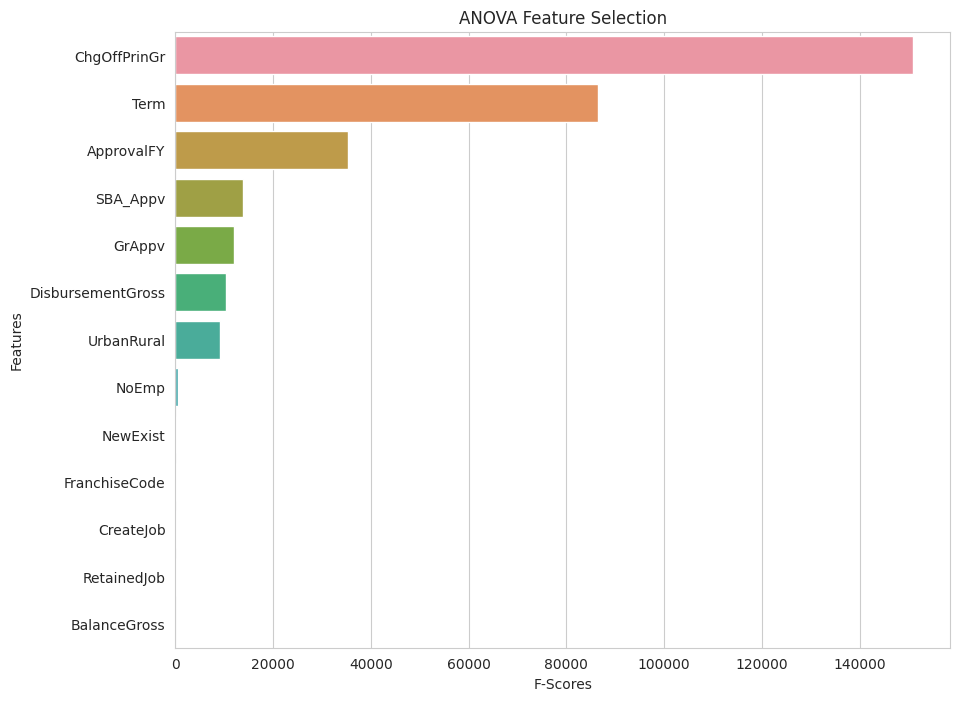

In [ ]:
# create horizontal bar plot for f-scores
plt.figure(figsize=(10, 8))
sns.barplot(x='F-Scores', y='Features', data=anova_results, orient='h')
plt.title('ANOVA Feature Selection')
plt.xlabel('F-Scores')
plt.ylabel('Features')
plt.show()

In [ ]:
# create a SelectKBest object
selector = SelectKBest(f_classif, k=5)

# fit selector to data
selector.fit(X, y)

# get selected features
selected_features = X.columns[selector.get_support()]

# display selected features
print('Selected features:', list(selected_features))

Selected features: ['ApprovalFY', 'Term', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']


## Feature Selection using Chi2

In [ ]:
# split dataset into features (X) and target (y)
X = df[['RevLineCr',	'LowDoc', 'Industry']]
y = df['MIS_Status']

# convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, columns=X.columns)

# perform Chi2 feature selection
chi2_scores, p_values = chi2(X, y)

# create a dataframe to store feature names, chi2_scores, and p-values
chi2_results = pd.DataFrame({'Features': X.columns, 'chi2_scores': chi2_scores, 'P-Values': p_values})

# sort the dataframe by descending chi2_scores
chi2_results = chi2_results.sort_values(by='chi2_scores', ascending=False)

# print the feature scores
chi2_results = chi2_results.reset_index(drop=True)

# Only RevLineCr_Y, LowDoc_Y, RevLineCr_Y, LowDoc_N
chi2_results = chi2_results.drop(chi2_results.index[32:])
chi2_results = chi2_results.drop([0, 4, 14, 19, 22, 23, 28, 30]).reset_index(drop=True)
chi2_results

Features  chi2_scores  \
0                                         RevLineCr_Y  4072.750910   
1                                            LowDoc_Y  3659.767404   
2            Industry_Health Care / Social Assistance  3298.987400   
3                              Industry_Manufacturing   985.150233   
4                                         RevLineCr_N   734.675374   
5   Industry_Agriculture / Forestry / Fishing / Hu...   687.072540   
6             Industry_Real Estate / Rental / Leasing   601.293626   
7               Industry_Transportation / Warehousing   529.671933   
8                               Industry_Retail trade   488.983826   
9                                            LowDoc_N   384.720790   
10                              Industry_Construction   380.547759   
11                       Industry_Finance / Insurance   373.014693   
12  Industry_Administrative & Support / Waste Mana...   215.160847   
13   Industry_Mining / Quarrying / Oil&Gas Extraction   157.259613   
14                               Industry_Information   145.906029   
15              Industry_Accomodation / Food Services   126.789888   
16                               Industry_Educational    56.272842   
17  Industry_Proffesional / Scientific / Tech.Service    54.823782   
18   Industry_Management of Companies and Enterprises    16.231526   
19      Industry_Other Services (except public admin)    15.383358   
20                                 Industry_Utilities    14.118814   
21                           Industry_Wholesale trade    14.066589   
22                     Industry_Public Administration     3.385825   
23         Industry_Arts / Entertainment / Recreation     1.311063   

         P-Values  
0    0.000000e+00  
1    0.000000e+00  
2    0.000000e+00  
3   3.034549e-216  
4   8.621301e-162  
5   1.935987e-151  
6   8.758417e-133  
7   3.329060e-117  
8   2.370940e-108  
9    1.167314e-85  
10   9.455962e-85  
11   4.128659e-83  
12   1.027965e-48  
13   4.491810e-36  
14   1.361083e-33  
15   2.065205e-29  
16   6.308073e-14  
17   1.318358e-13  
18   5.605350e-05  
19   8.775781e-05  
20   1.716187e-04  
21   1.764506e-04  
22   6.575924e-02  
23   2.522022e-01

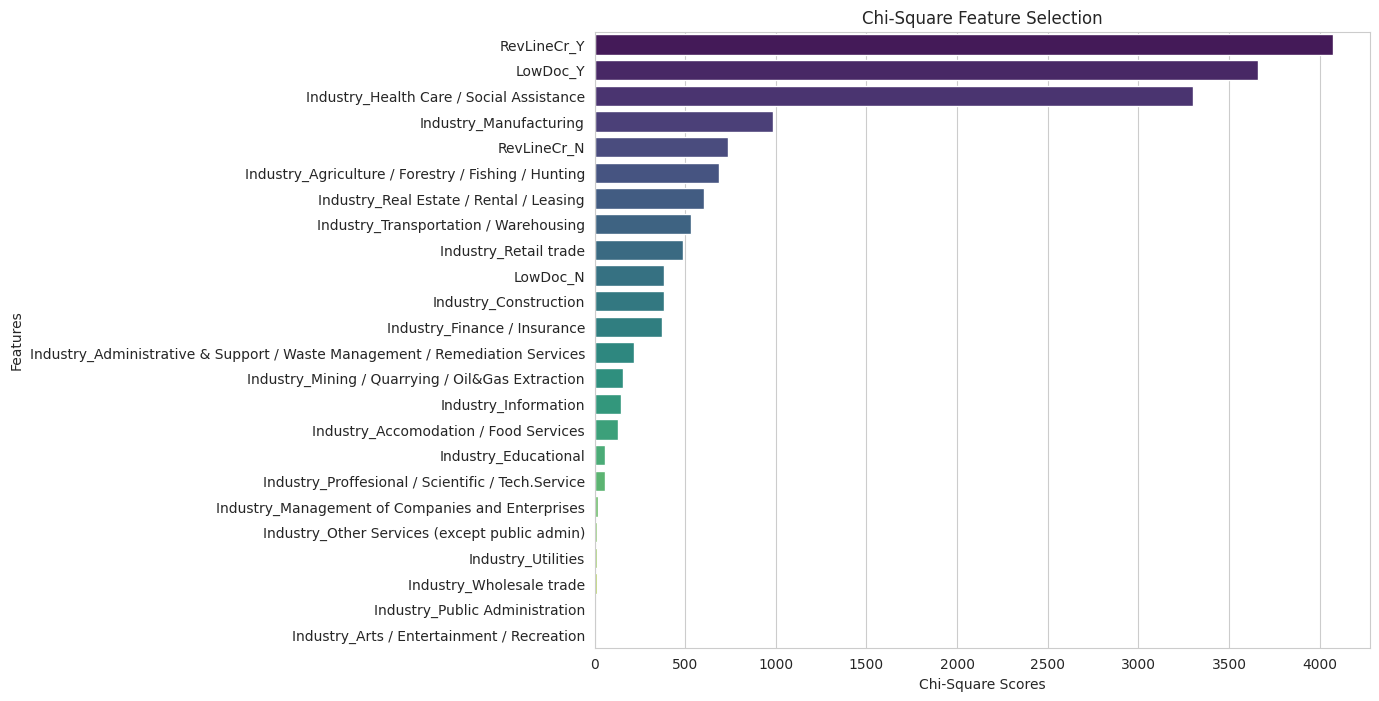

In [ ]:
# create horizontal bar plot for chi-square scores
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='chi2_scores', y='Features', data=chi2_results, palette='viridis')

# set title and labels
ax.set_title('Chi-Square Feature Selection')
ax.set_xlabel('Chi-Square Scores')
ax.set_ylabel('Features')

# show the plot
plt.show()

## Plot Insight

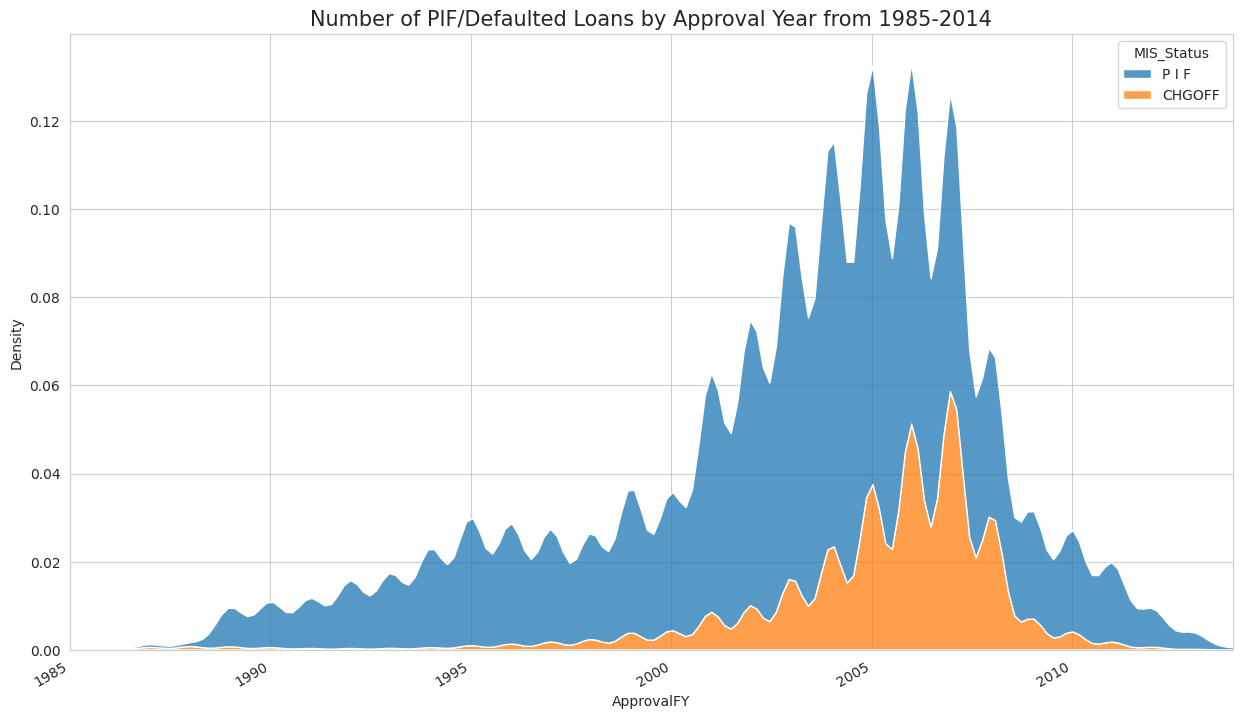

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15,8))
sns.kdeplot(x = df.ApprovalFY, hue=df.MIS_Status, multiple="stack", ax=ax)
ax.set_title('Number of PIF/Defaulted Loans by Approval Year from 1985-2014', fontsize=15)
plt.xticks(rotation = 30, fontsize = 10, horizontalalignment='right')
plt.xlim(1985,2014)
plt.show()

1. The number of customers who are able to repay loans (PIF) is greater than those who are unable to repay loans (CHGOFF).
2. The increase in the number of loans began in 1998, and the highest frequency was in the range of 2003-2007.
3. In 1998, the era of industrial transformation 3.0 began, so that many loans were disbursed, but in 2007 there was an economic recession in the US resulting in a decline and a peak in payment defaults due to the recession.
4. Loans at banks throughout the United States from SBA data started from 1984 to 2014, but data > 2010 will be deleted because the data was dominated by unfinished loans (data with DisbursementFY > 2010 and Term > 48) as much as 80% where loans were not can be decided in default or not.

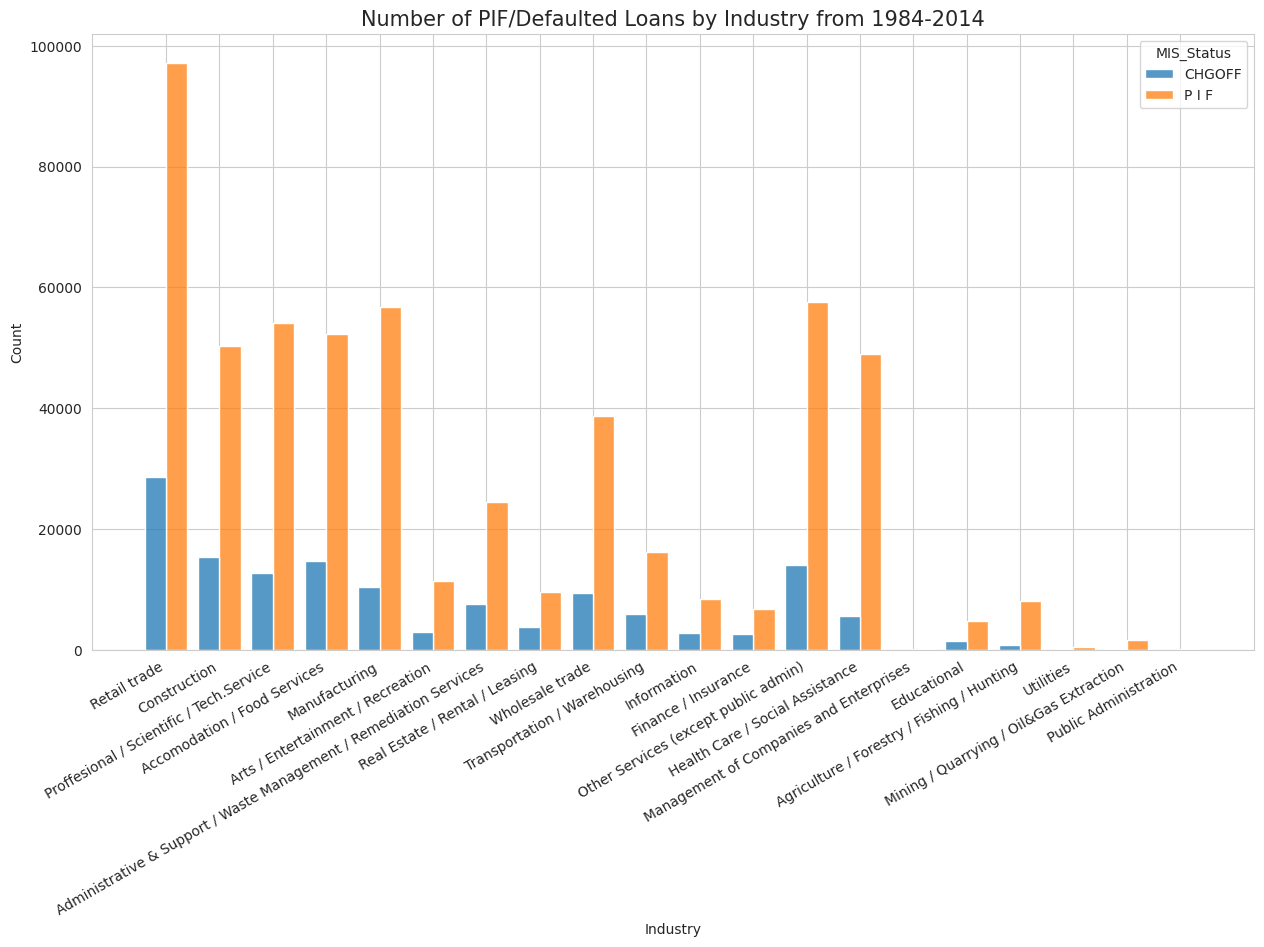

In [ ]:
df_a = df.sort_values('MIS_Status', ascending = True)

fig, ax = plt.subplots(1, 1, figsize = (15,8))
sns.histplot(data=df_a, x="Industry", hue="MIS_Status", multiple="dodge", shrink=.8, ax=ax)
ax.set_title('Number of PIF/Defaulted Loans by Industry from 1984-2014', fontsize=15)
plt.xticks(rotation = 30, fontsize = 10, ha='right')
plt.show()

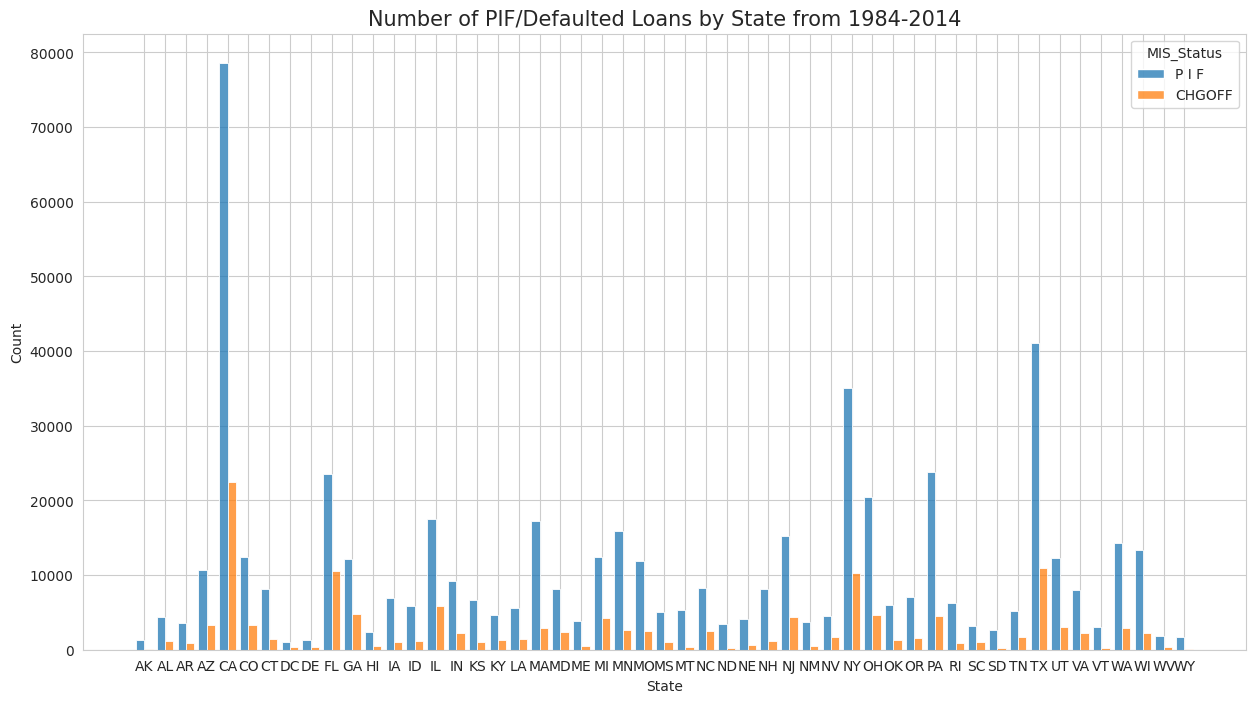

In [ ]:
df_a = df.sort_values('State', ascending = True)

fig, ax = plt.subplots(1, 1, figsize = (15,8))
sns.histplot(data=df_a, x="State", hue="MIS_Status", multiple="dodge", shrink=.8, ax=ax)
ax.set_title('Number of PIF/Defaulted Loans by State from 1984-2014', fontsize=15)
# plt.xticks(fontsize = 10, ha='right')
plt.show()

In [ ]:
def_state = df.groupby(['State', 'Default'])['State'].count().unstack('Default')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])*100
def_state['count'] = def_state[1] + def_state[0]

def_state.sort_values('Def_Percent', ascending=False, inplace=True)
def_state.reset_index(inplace=True)
def_state.columns = ['State', 'PIF', 'CHGOFF','Percent', 'Count']
def_state

State    PIF  CHGOFF    Percent   Count
0     FL  23598   10595  30.985874   34193
1     GA  12153    4826  28.423346   16979
2     NV   4486    1724  27.761675    6210
3     DC    969     361  27.142857    1330
4     MI  12406    4269  25.601199   16675
5     IL  17534    5904  25.189863   23438
6     TN   5188    1733  25.039734    6921
7     AZ  10712    3372  23.942062   14084
8     SC   3192     986  23.599809    4178
9     NC   8288    2514  23.273468   10802
10    NY  35033   10342  22.792287   45375
11    MD   8148    2386  22.650465   10534
12    NJ  15174    4397  22.466915   19571
13    CA  78579   22458  22.227501  101037
14    VA   7985    2245  21.945259   10230
15    DE   1345     363  21.252927    1708
16    TX  41071   10938  21.030975   52009
17    KY   4680    1245  21.012658    5925
18    AL   4382    1163  20.973850    5545
19    CO  12481    3284  20.830955   15765
20    LA   5537    1426  20.479678    6963
21    UT  12315    3072  19.964905   15387
22    IN   9191    2218  19.440792   11409
23    AR   3515     842  19.325224    4357
24    OH  20452    4655  18.540646   25107
25    OR   7002    1525  17.884367    8527
26    HI   2352     500  17.531557    2852
27    MO  11833    2506  17.476811   14339
28    WV   1844     388  17.383513    2232
29    OK   5981    1237  17.137711    7218
30    MS   5063    1046  17.122279    6109
31    WA  14283    2891  16.833586   17174
32    ID   5871    1150  16.379433    7021
33    PA  23856    4532  15.964492   28388
34    CT   8099    1498  15.609044    9597
35    MA  17260    2970  14.681167   20230
36    WI  13395    2224  14.239068   15619
37    MN  15945    2585  13.950351   18530
38    KS   6692    1057  13.640470    7749
39    IA   6864    1055  13.322389    7919
40    RI   6311     915  12.662607    7226
41    NE   4095     578  12.368928    4673
42    NH   8141    1148  12.358704    9289
43    NM   3775     479  11.259991    4254
44    ME   3878     474  10.891544    4352
45    AK   1299     129   9.033613    1428
46    SD   2601     244   8.576450    2845
47    VT   3096     263   7.829711    3359
48    ND   3399     273   7.434641    3672
49    MT   5338     417   7.245873    5755
50    WY   1758     126   6.687898    1884

In [ ]:
def_ind = df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')
def_ind['Def_Percent'] = def_ind[1]/(def_ind[1] + def_ind[0])*100
def_ind['count'] = def_ind[1] + def_ind[0]

def_ind.sort_values('Def_Percent', ascending=False, inplace=True)
def_ind.reset_index(inplace=True)
def_ind.columns = ['Industry', 'PIF', 'CHGOFF','Percent','Count']
def_ind

Industry    PIF  CHGOFF  \
0                      Real Estate / Rental / Leasing   9584    3873   
1                                 Finance / Insurance   6724    2654   
2                        Transportation / Warehousing  16269    5866   
3                                         Information   8430    2790   
4                                         Educational   4793    1520   
5   Administrative & Support / Waste Management / ...  24544    7570   
6                                        Construction  50314   15321   
7                                        Retail trade  97103   28659   
8                        Accomodation / Food Services  52306   14778   
9                   Arts / Entertainment / Recreation  11472    2988   
10               Other Services (except public admin)  57624   14130   
11                                    Wholesale trade  38714    9434   
12           Proffesional / Scientific / Tech.Service  54143   12808   
13                                      Manufacturing  56768   10341   
14                              Public Administration    188      34   
15                                          Utilities    560      94   
16                    Health Care / Social Assistance  48951    5682   
17            Management of Companies and Enterprises    230      26   
18         Agriculture / Forestry / Fishing / Hunting   8062     806   
19            Mining / Quarrying / Oil&Gas Extraction   1666     154   

      Percent   Count  
0   28.780560   13457  
1   28.300277    9378  
2   26.501016   22135  
3   24.866310   11220  
4   24.077301    6313  
5   23.572274   32114  
6   23.342729   65635  
7   22.788283  125762  
8   22.029098   67084  
9   20.663900   14460  
10  19.692282   71754  
11  19.593753   48148  
12  19.130409   66951  
13  15.409260   67109  
14  15.315315     222  
15  14.373089     654  
16  10.400308   54633  
17  10.156250     256  
18   9.088859    8868  
19   8.461538    1820

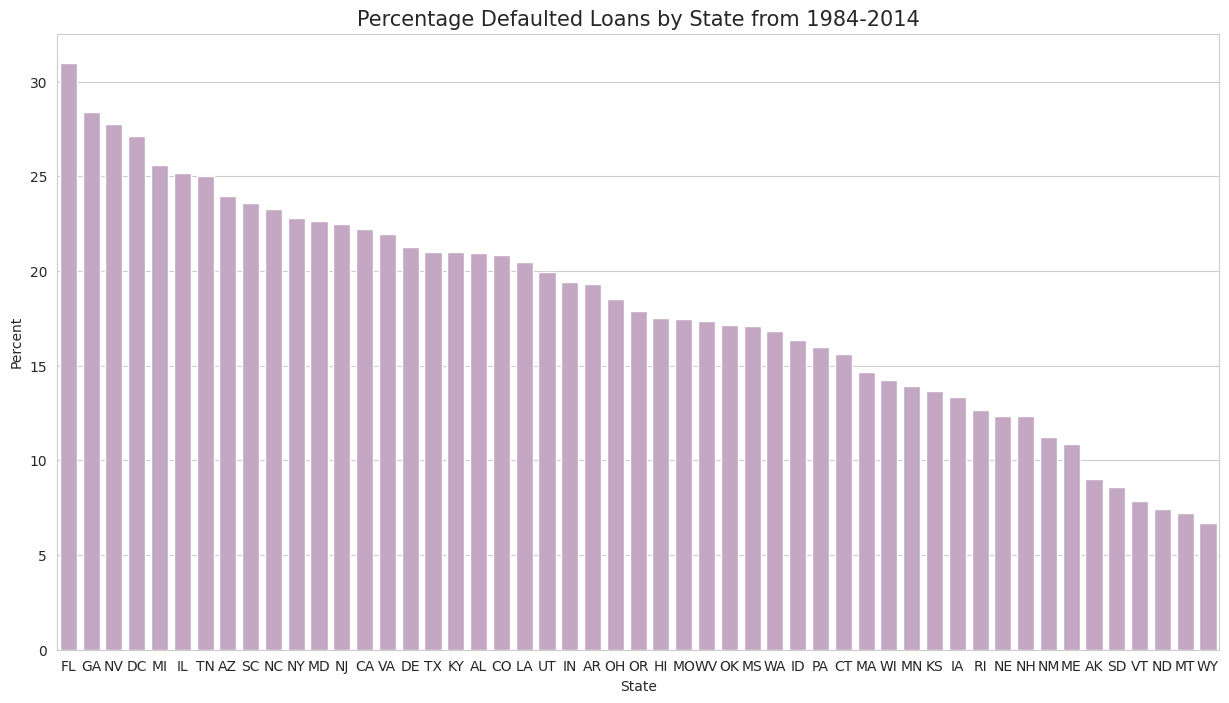

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15,8))
sns.barplot(data=def_state, x="State", y="Percent", width=0.75, color='#C8A2C8', ax=ax)
ax.set_title('Percentage Defaulted Loans by State from 1984-2014', fontsize=15)
# plt.xticks(rotation = 30, fontsize = 10, ha='right')
plt.show()

The state that has the highest percentage of defaulted loans is Florida up to 30%, but the largest number of customers is in California with up to 100.000 users

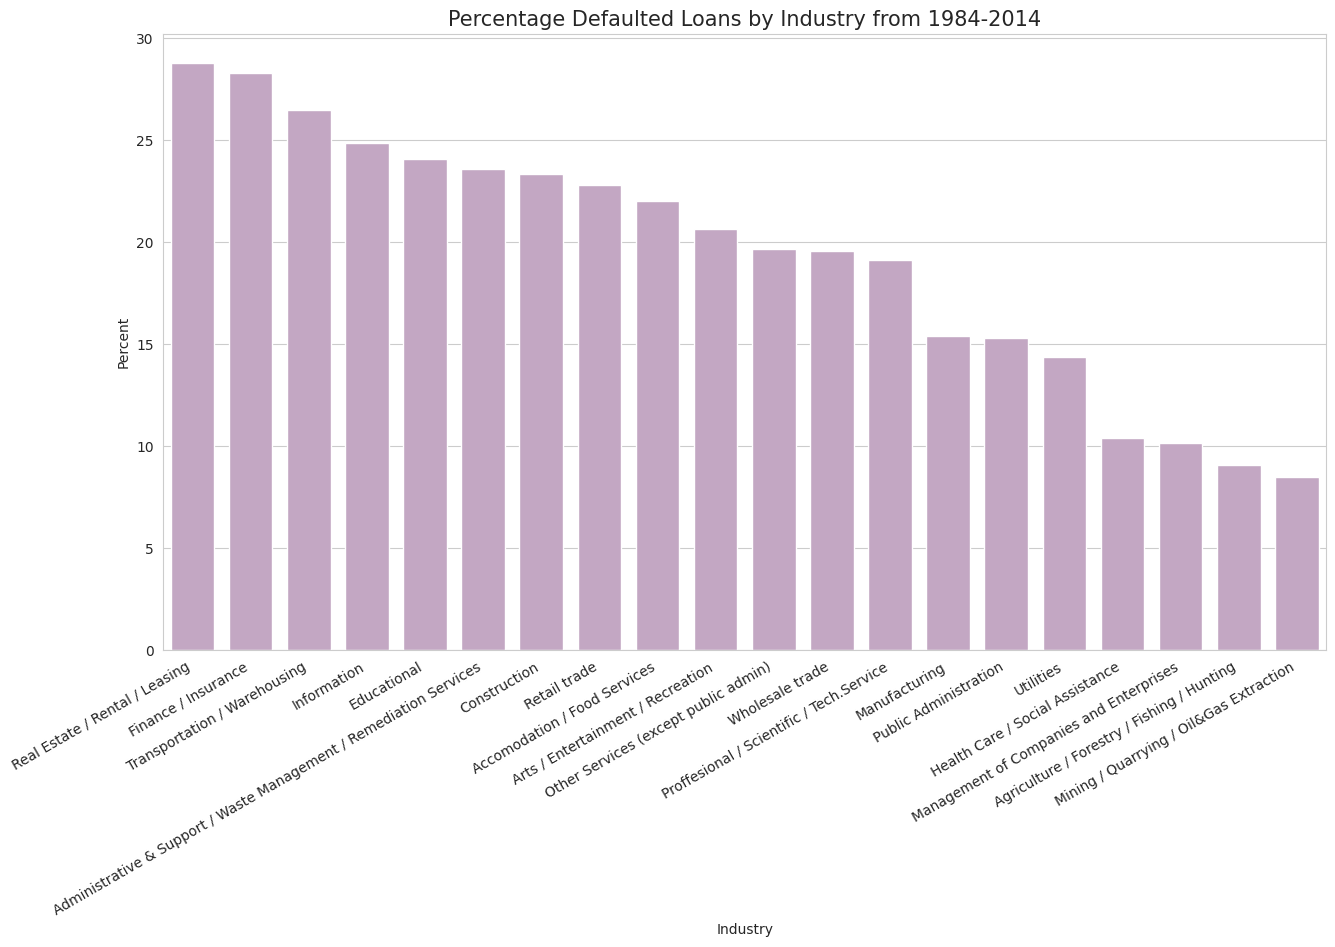

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15,8))
sns.barplot(data=def_ind, x="Industry", y="Percent", width=0.75, color='#C8A2C8', ax=ax)
ax.set_title('Percentage Defaulted Loans by Industry from 1984-2014', fontsize=15)
plt.xticks(rotation = 30, fontsize = 10, ha='right')
plt.show()

The industrial sector that has the highest bad credit is Real Estate/Rental/Leasing and Finance/Insurance up to 28%. This is because the industrial sector has a high risk. In this data there was a big recession in America from 2007 to 2009 so that it will reduce the amount Paid in Full.

In [ ]:
ins1_group = df.groupby(['Industry', 'MIS_Status'])['LoanNr_ChkDgt'].count().reset_index()
ins1_pivot = ins1_group.pivot_table(index='Industry', columns='MIS_Status').reset_index()
ins1_pivot.columns = ['Industry', 'CHGOFF', 'PIF']

ins1_pivot = ins1_pivot.sort_values('CHGOFF', ascending = True).reset_index(drop = True)
ins1_pivot

Industry  CHGOFF    PIF
0             Management of Companies and Enterprises      26    230
1                               Public Administration      34    188
2                                           Utilities      94    560
3             Mining / Quarrying / Oil&Gas Extraction     154   1666
4          Agriculture / Forestry / Fishing / Hunting     806   8062
5                                         Educational    1520   4793
6                                 Finance / Insurance    2654   6724
7                                         Information    2790   8430
8                   Arts / Entertainment / Recreation    2988  11472
9                      Real Estate / Rental / Leasing    3873   9584
10                    Health Care / Social Assistance    5682  48951
11                       Transportation / Warehousing    5866  16269
12  Administrative & Support / Waste Management / ...    7570  24544
13                                    Wholesale trade    9434  38714
14                                      Manufacturing   10341  56768
15           Proffesional / Scientific / Tech.Service   12808  54143
16               Other Services (except public admin)   14130  57624
17                       Accomodation / Food Services   14778  52306
18                                       Construction   15321  50314
19                                       Retail trade   28659  97103

In [ ]:
df_ins1 = (df.groupby('Industry')['MIS_Status']
           .value_counts(normalize=True) #proporsi
           .mul(100) #x100
           .round(2) #pembulatan 2 angka
           .unstack()) #pemisah
df_ins1 = df_ins1.reset_index()
df_ins1.columns = ['Industry', 'CHGOFF', 'PIF']

df_ins1 = df_ins1.sort_values('CHGOFF', ascending = True).reset_index(drop = True)
df_ins1

Industry  CHGOFF    PIF
0             Mining / Quarrying / Oil&Gas Extraction    8.46  91.54
1          Agriculture / Forestry / Fishing / Hunting    9.09  90.91
2             Management of Companies and Enterprises   10.16  89.84
3                     Health Care / Social Assistance   10.40  89.60
4                                           Utilities   14.37  85.63
5                               Public Administration   15.32  84.68
6                                       Manufacturing   15.41  84.59
7            Proffesional / Scientific / Tech.Service   19.13  80.87
8                                     Wholesale trade   19.59  80.41
9                Other Services (except public admin)   19.69  80.31
10                  Arts / Entertainment / Recreation   20.66  79.34
11                       Accomodation / Food Services   22.03  77.97
12                                       Retail trade   22.79  77.21
13                                       Construction   23.34  76.66
14  Administrative & Support / Waste Management / ...   23.57  76.43
15                                        Educational   24.08  75.92
16                                        Information   24.87  75.13
17                       Transportation / Warehousing   26.50  73.50
18                                Finance / Insurance   28.30  71.70
19                     Real Estate / Rental / Leasing   28.78  71.22

Text(0.5, 0.98, 'MIS Status by Industry 1984 - 2014')

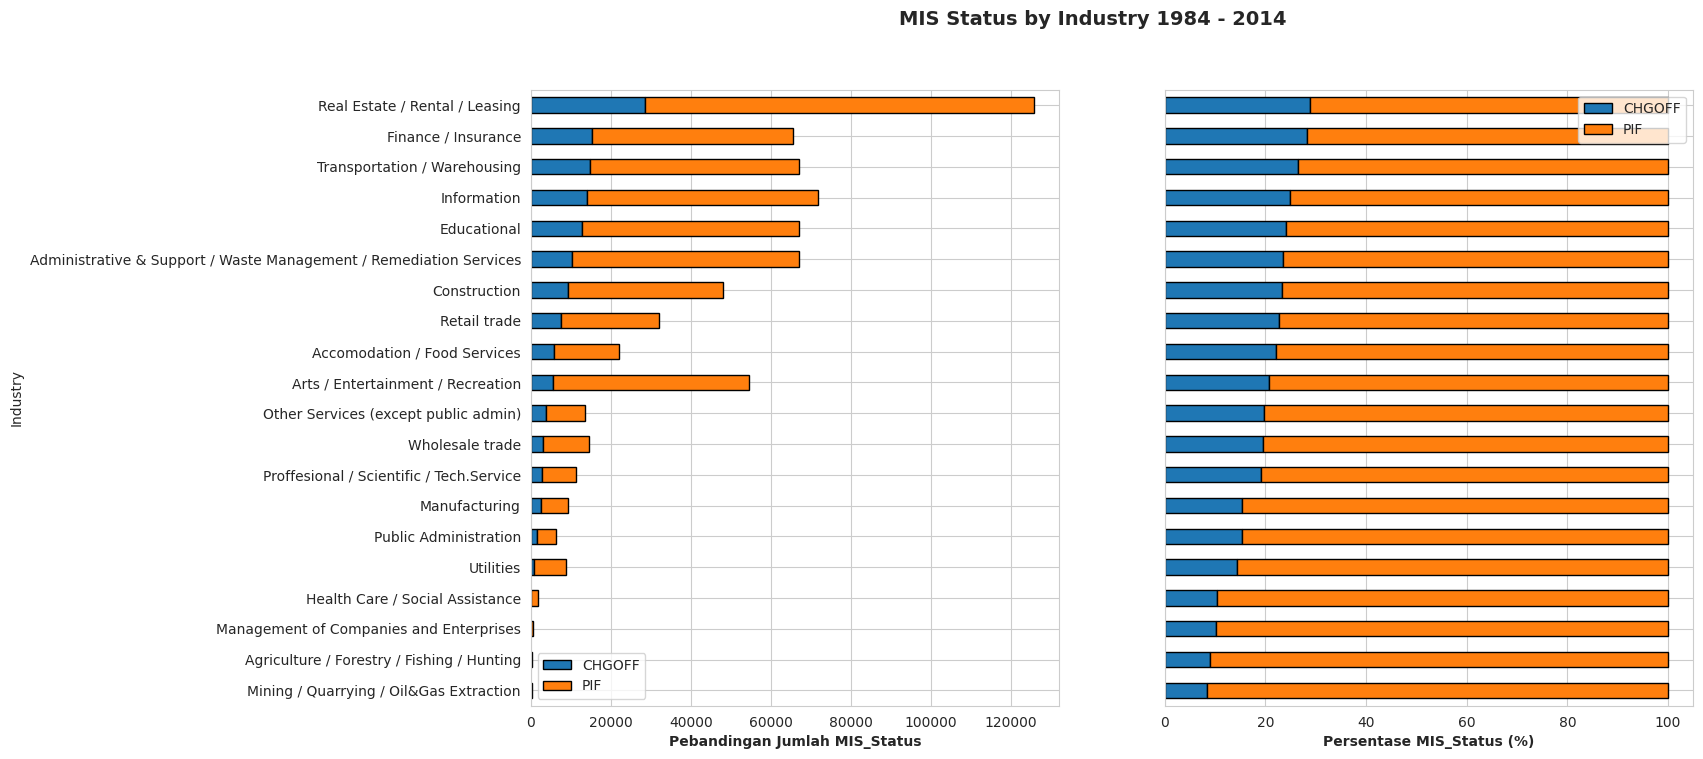

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,8), sharey = True)

ins1_pivot.plot(x = 'Industry', kind='barh', stacked=True, edgecolor= 'black', ax = ax[0])
# ax[1].title('Perbandingan Jumlah', fontweight='bold', fontsize=17, pad=14)
ax[0].set_xlabel('Pebandingan Jumlah MIS_Status', fontweight='bold')
# ax[0].set_ylabel('Industry', fontweight='bold')
# ax[1].legend(labels=['CHGOFF', 'P I F'], bbox_to_anchor = [1.25,0.9])

df_ins1.plot(x = 'Industry', kind='barh', stacked=True, edgecolor='black', ax = ax[1])
# ax[0].title('Perbandingan Persentase', fontweight='bold', fontsize=17, pad=14)
ax[1].set_xlabel('Persentase MIS_Status (%)', fontweight='bold')
# ax[1].set_ylabel('Industry', fontweight='bold')
# ax[0].legend(bbox_to_anchor = [1.25*1.5,0.9])

fig.suptitle("MIS Status by Industry 1984 - 2014", fontsize=14, weight = 'bold')

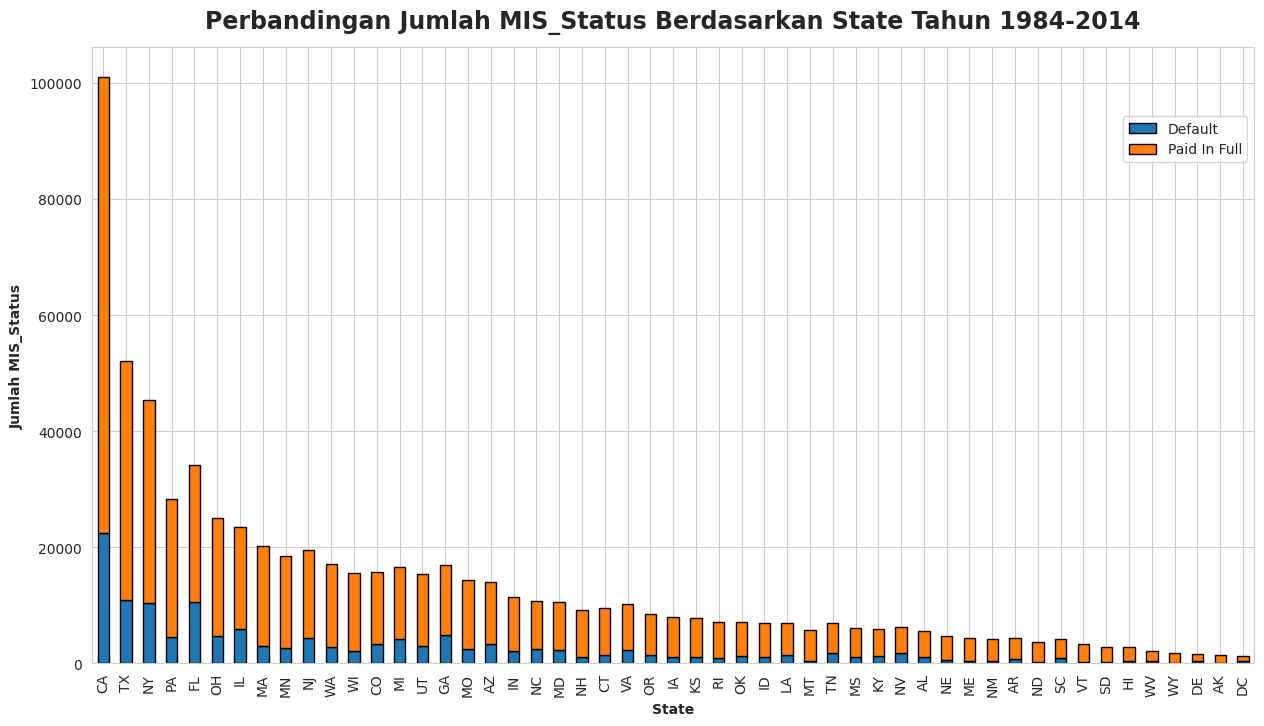

In [ ]:
ins_t1 = pd.pivot_table(df,
                         index=['State'],
                         columns=['MIS_Status'],
                         values=['LoanNr_ChkDgt'],
                         aggfunc={'LoanNr_ChkDgt' : ['nunique']})

ins_t1 = ins_t1.reset_index()
ins_t1.columns = ['State', 'CHGOFF', 'PIF']

ins_t1 = ins_t1.sort_values('PIF', ascending = False, ignore_index = True)

fig, ax= plt.subplots(1,1,figsize=(15,8))
ins_t1.plot(x = 'State', kind='bar', stacked=True, edgecolor= 'black', ax=ax)
plt.title('Perbandingan Jumlah MIS_Status Berdasarkan State Tahun 1984-2014', fontweight='bold', fontsize=17, pad=14)
plt.xlabel('State', fontweight='bold')
plt.ylabel('Jumlah MIS_Status', fontweight='bold')
plt.legend(labels=['Default', 'Paid In Full'], bbox_to_anchor = [1,0.9])

In [ ]:
df_a = df[(df['ApprovalFY'] >= 2007) & (df['ApprovalFY'] <= 2009)]

ins1_group = df_a.groupby(['Industry', 'MIS_Status'])['LoanNr_ChkDgt'].count().reset_index()
ins1_pivot = ins1_group.pivot_table(index='Industry', columns='MIS_Status').reset_index()
ins1_pivot.columns = ['Industry', 'CHGOFF', 'PIF']

ins1_pivot = ins1_pivot.sort_values('CHGOFF', ascending = True).reset_index(drop = True)
ins1_pivot

Industry  CHGOFF    PIF
0             Management of Companies and Enterprises      11     17
1                               Public Administration      14     20
2                                           Utilities      44     65
3             Mining / Quarrying / Oil&Gas Extraction      61    248
4          Agriculture / Forestry / Fishing / Hunting     149    735
5                                         Educational     667    963
6                                         Information     967   1296
7                   Arts / Entertainment / Recreation    1061   1626
8                                 Finance / Insurance    1143   1273
9                      Real Estate / Rental / Leasing    1801   1854
10                    Health Care / Social Assistance    1842   6501
11                       Transportation / Warehousing    2516   3607
12  Administrative & Support / Waste Management / ...    2854   4008
13                                    Wholesale trade    3079   4325
14                                      Manufacturing    3206   6759
15               Other Services (except public admin)    4818   7000
16                       Accomodation / Food Services    5098   8636
17           Proffesional / Scientific / Tech.Service    5468   8819
18                                       Construction    6060   8410
19                                       Retail trade    9196  12097

In [ ]:
df_ins1 = (df_a.groupby('Industry')['MIS_Status']
           .value_counts(normalize=True) #proporsi
           .mul(100) #x100
           .round(2) #pembulatan 2 angka
           .unstack()) #pemisah
df_ins1 = df_ins1.reset_index()
df_ins1.columns = ['Industry', 'CHGOFF', 'PIF']

df_ins1 = df_ins1.sort_values('CHGOFF', ascending = True).reset_index(drop = True)
df_ins1

Industry  CHGOFF    PIF
0          Agriculture / Forestry / Fishing / Hunting   16.86  83.14
1             Mining / Quarrying / Oil&Gas Extraction   19.74  80.26
2                     Health Care / Social Assistance   22.08  77.92
3                                       Manufacturing   32.17  67.83
4                        Accomodation / Food Services   37.12  62.88
5            Proffesional / Scientific / Tech.Service   38.27  61.73
6             Management of Companies and Enterprises   39.29  60.71
7                   Arts / Entertainment / Recreation   39.49  60.51
8                                           Utilities   40.37  59.63
9                Other Services (except public admin)   40.77  59.23
10                                        Educational   40.92  59.08
11                       Transportation / Warehousing   41.09  58.91
12                              Public Administration   41.18  58.82
13  Administrative & Support / Waste Management / ...   41.59  58.41
14                                    Wholesale trade   41.59  58.41
15                                       Construction   41.88  58.12
16                                        Information   42.73  57.27
17                                       Retail trade   43.19  56.81
18                                Finance / Insurance   47.31  52.69
19                     Real Estate / Rental / Leasing   49.27  50.73

Text(0.5, 0.98, 'MIS Status by Industry in Great Recession 2007 - 2009')

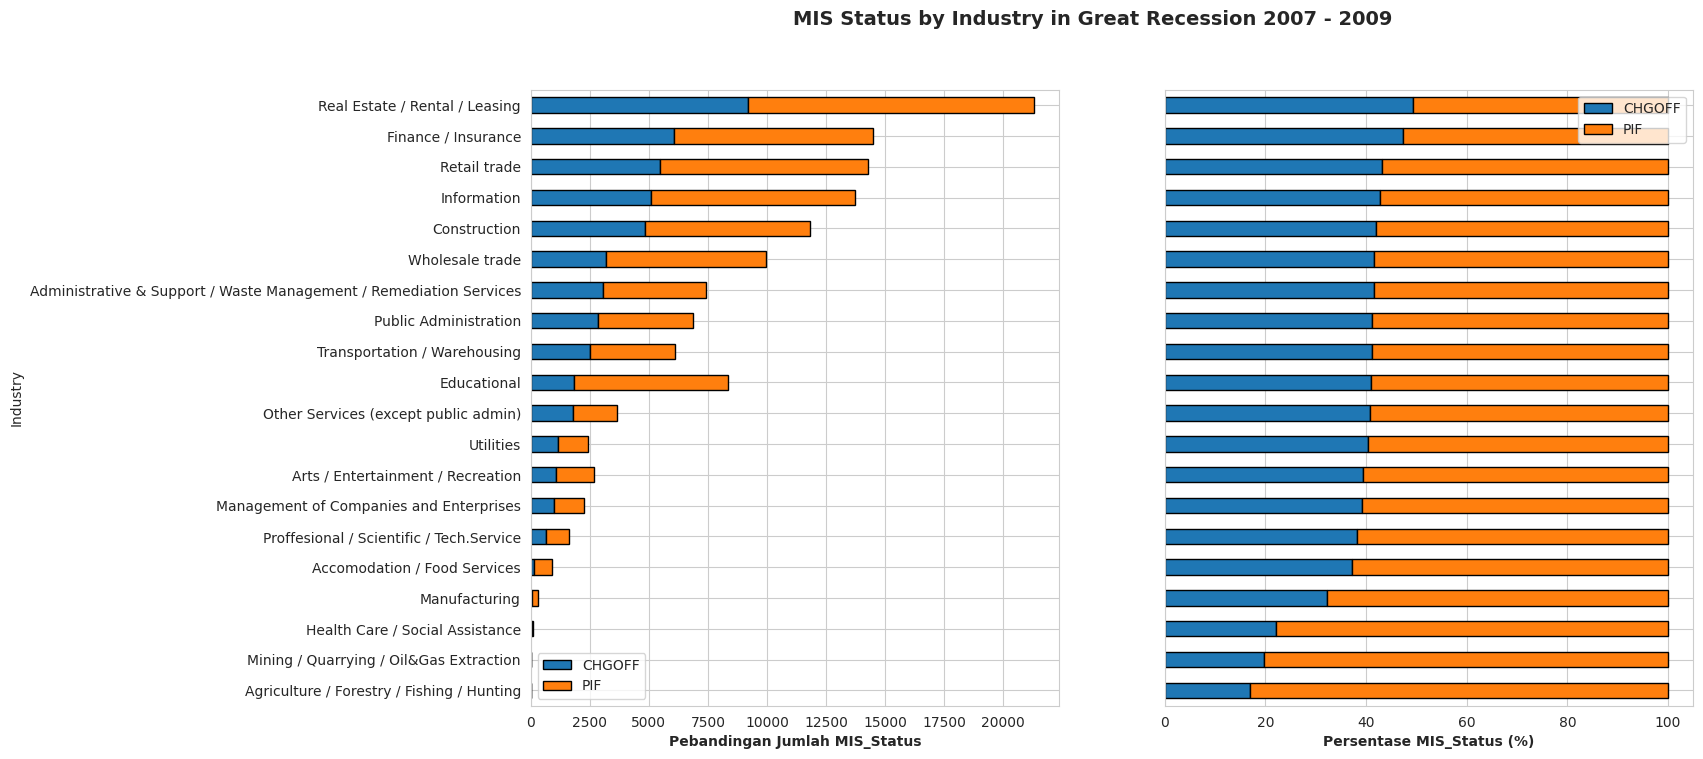

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,8), sharey = True)

ins1_pivot.plot(x = 'Industry', kind='barh', stacked=True, edgecolor= 'black', ax = ax[0])
# ax[1].title('Perbandingan Jumlah', fontweight='bold', fontsize=17, pad=14)
ax[0].set_xlabel('Pebandingan Jumlah MIS_Status', fontweight='bold')
# ax[0].set_ylabel('Industry', fontweight='bold')
# ax[1].legend(labels=['CHGOFF', 'P I F'], bbox_to_anchor = [1.25,0.9])

df_ins1.plot(x = 'Industry', kind='barh', stacked=True, edgecolor='black', ax = ax[1])
# ax[0].title('Perbandingan Persentase', fontweight='bold', fontsize=17, pad=14)
ax[1].set_xlabel('Persentase MIS_Status (%)', fontweight='bold')
# ax[1].set_ylabel('Industry', fontweight='bold')
# ax[0].legend(bbox_to_anchor = [1.25*1.5,0.9])

fig.suptitle("MIS Status by Industry in Great Recession 2007 - 2009", fontsize=14, weight = 'bold')

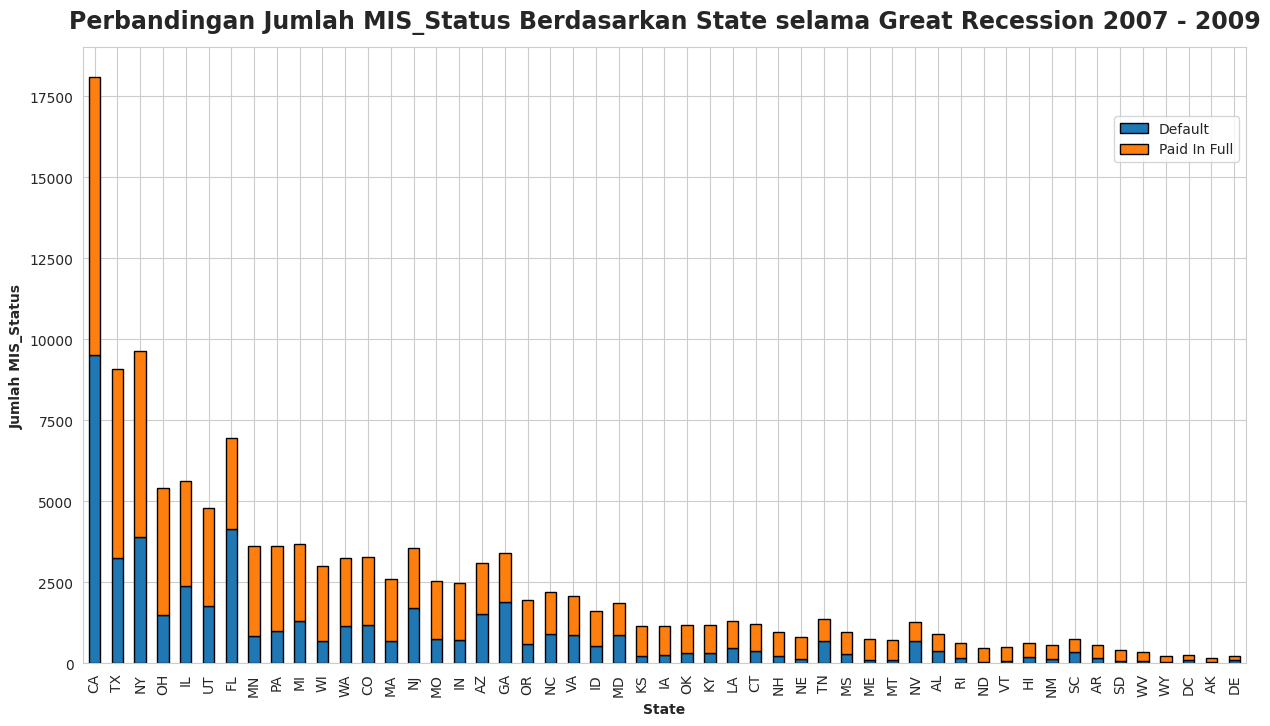

In [ ]:
ins_t2 = pd.pivot_table(df_a,
                         index=['State'],
                         columns=['MIS_Status'],
                         values=['LoanNr_ChkDgt'],
                         aggfunc={'LoanNr_ChkDgt' : ['nunique']})

ins_t2 = ins_t2.reset_index()
ins_t2.columns = ['State', 'CHGOFF', 'PIF']

ins_t2 = ins_t2.sort_values('PIF', ascending = False, ignore_index = True)

fig, ax= plt.subplots(1,1,figsize=(15,8))
ins_t2.plot(x = 'State', kind='bar', stacked=True, edgecolor= 'black', ax=ax)
plt.title('Perbandingan Jumlah MIS_Status Berdasarkan State selama Great Recession 2007 - 2009', fontweight='bold', fontsize=17, pad=14)
plt.xlabel('State', fontweight='bold')
plt.ylabel('Jumlah MIS_Status', fontweight='bold')
plt.legend(labels=['Default', 'Paid In Full'], bbox_to_anchor = [1,0.9])

Text(83.34722222222221, 0.5, 'Number of Default Loans')

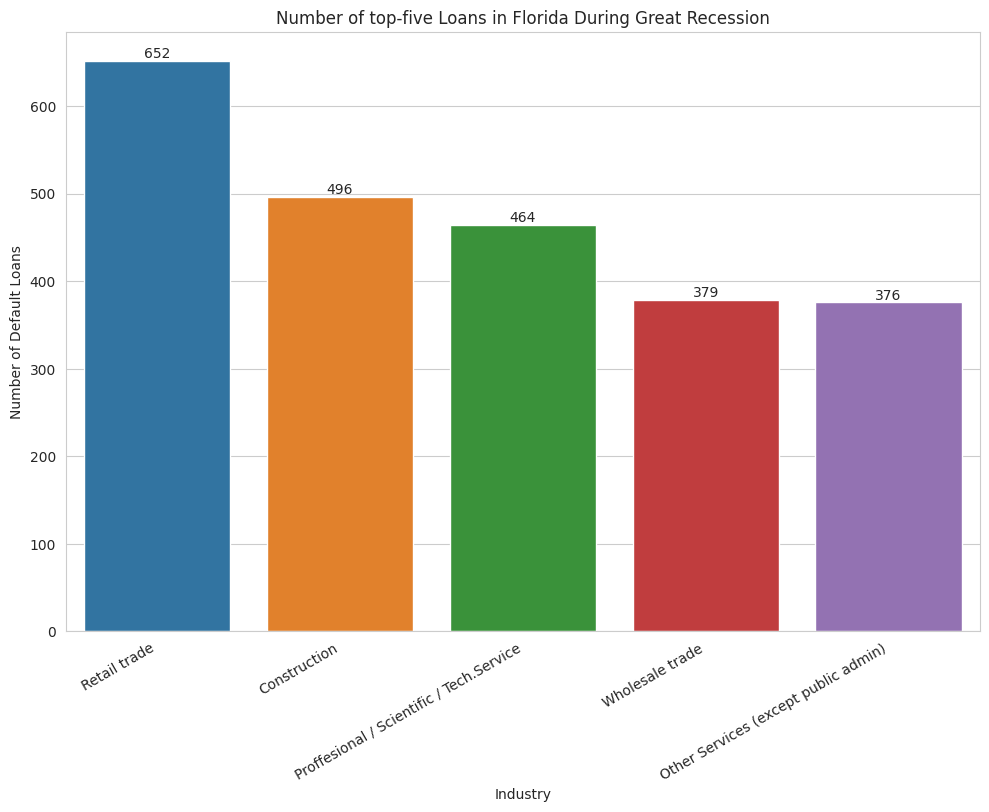

In [ ]:
dflorida = df[ (df['State'].isin(['FL'])) 
                    & (  (df['ApprovalFY']>= 2007) & (df['ApprovalFY'] <= 2009) ) & (df['Default'] == 1)]
dfl_groupby = dflorida.groupby('Industry')['LoanNr_ChkDgt'].nunique().reset_index(name = 'NumberofDefaultLoans').sort_values(['NumberofDefaultLoans'], ascending = False).head()
dfl_groupby

fig, ax= plt.subplots(1,1,figsize=(10,8))

sns.barplot(data=dfl_groupby, x="Industry", y="NumberofDefaultLoans")
ax.set_xticklabels(dfl_groupby.reset_index(drop=True).Industry, rotation=30, ha='right', fontsize=10)

for i in ax.containers:
    ax.bar_label(i)
plt.tight_layout() 


plt.title('Number of top-five Loans in Florida During Great Recession')
plt.ylabel('Number of Default Loans')

During the Great Recession in Florida (the state with the most defaults), bad loans were dominated by: Retail Trade (512 loans), Construction (423 loans), Prof/Science/Tech (398 loans), Wholesale Trade (319 loans) . ), and another pub no (299 loans). It can be concluded that this type of industry was most affected by the Great Florida Recession.

Suggestion: Banks that provide loans in Florida must be more selective in providing loans in this sector because it is less stable in Florida

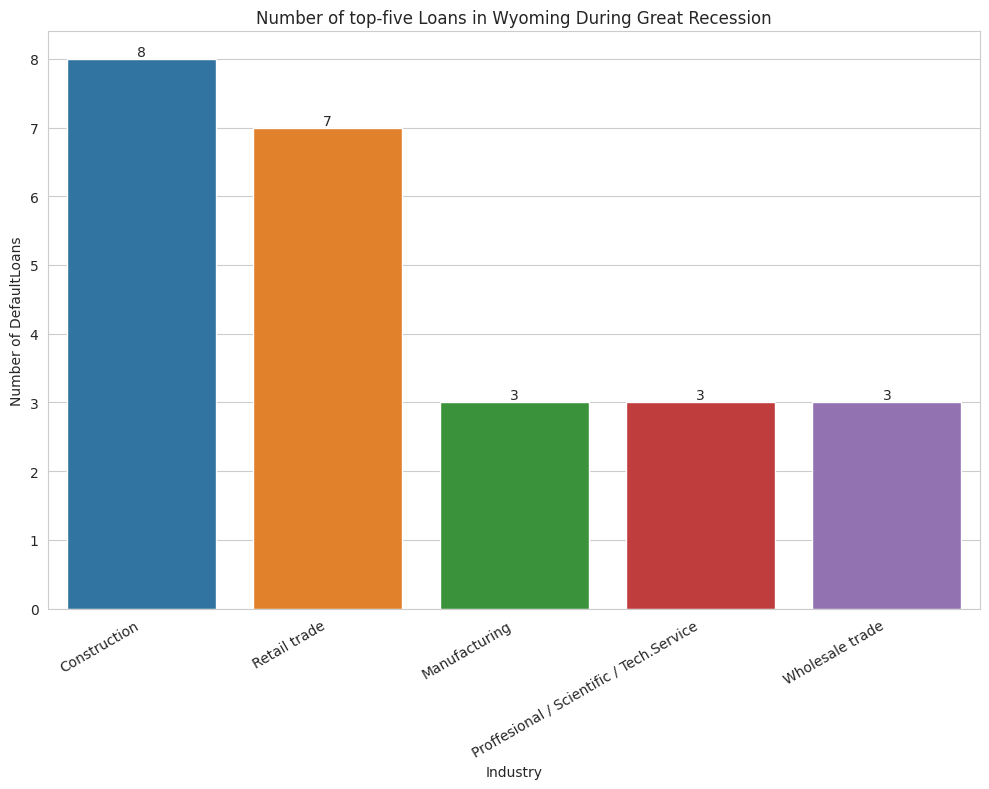

In [ ]:
dwyoming = df[ (df['State'].isin(['WY'])) 
                    & (  (df['ApprovalFY']>= 2007) & (df['ApprovalFY'] <= 2009) ) & (df['Default'] == 1)]
dwy_groupby = dwyoming.groupby('Industry')['LoanNr_ChkDgt'].nunique().reset_index(name = 'NumberofLoans').sort_values(['NumberofLoans'], ascending = False).head()

fig,ax= plt.subplots(1,1,figsize=(10,8))

sns.barplot(data=dwy_groupby, x="Industry", y="NumberofLoans")
ax.set_xticklabels(dwy_groupby.reset_index(drop=True).Industry, rotation=30, ha='right', fontsize=10)

for i in ax.containers:
    ax.bar_label(i)

plt.tight_layout()
plt.title('Number of top-five Loans in Wyoming During Great Recession')
plt.ylabel('Number of DefaultLoans')
plt.tight_layout()

During the Great Recession in Wyoming (State with fewest defaults), default loans were dominated by: Contraction (8 loans), Retail Trade (7 loans), Wholesale Trade (3 loans), Manufacturing (2 loans), and no pubs others ( 2 loans). It can be concluded that Wyoming was the state with very few defaults during the Great Recession, even as the sector with the most defaults did not touch 10 loans. This area is surrounded by subtropical forests and mountains so there is very little industry available.

<ipython-input-55-05590e58ab9c>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending = False)
<ipython-input-55-05590e58ab9c>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)
<ipython-input-55-05590e58ab9c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_industrySum.index, rotation=30, ha='right', fontsize=8)
<ipython-input-55-05590e58ab9c>:19: UserWarning: FixedFormatter should only be use

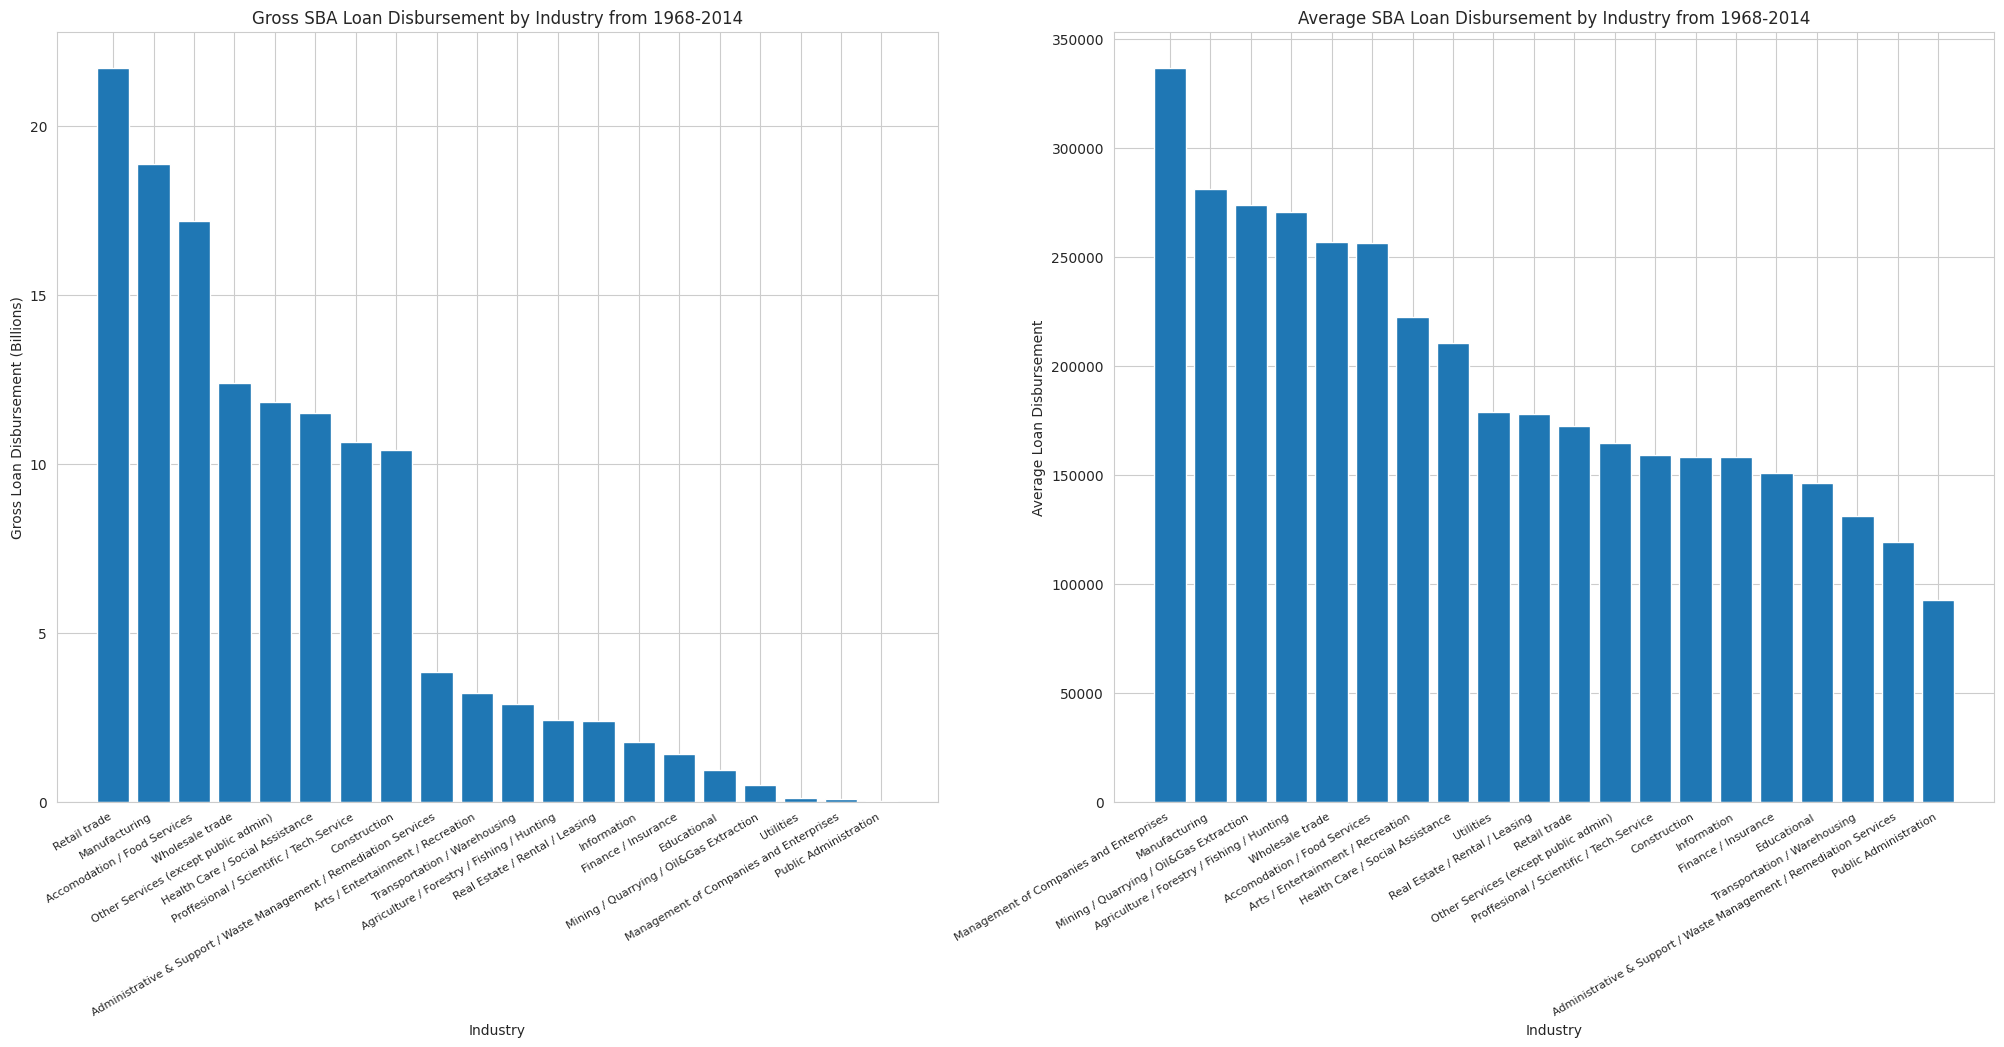

In [ ]:
industry_group = df.groupby(['Industry'])

df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending = False)
df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)

fig = plt.figure(figsize=(25,10))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.bar(df_industrySum.index, df_industrySum['DisbursementGross'] / 1000000000)
ax1.set_xticklabels(df_industrySum.index, rotation=30, ha='right', fontsize=8)

ax1.set_title('Gross SBA Loan Disbursement by Industry from 1968-2014', fontsize=12)
ax1.set_xlabel('Industry', fontsize = 10)
ax1.set_ylabel('Gross Loan Disbursement (Billions)', fontsize = 10)

ax2.bar(df_industryAve.index, df_industryAve['DisbursementGross'])
ax2.set_xticklabels(df_industryAve.index, rotation=30, ha='right', fontsize=8)

ax2.set_title('Average SBA Loan Disbursement by Industry from 1968-2014', fontsize=12)
ax2.set_xlabel('Industry',  fontsize = 10)
ax2.set_ylabel('Average Loan Disbursement',  fontsize = 10)

plt.show()

In [ ]:
print(df.shape)
df.isnull().sum()

(687973, 29)


LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           544089
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
Industry                  0
Default                   0
dtype: int64

# Stage 2 - Pre-Processing

## Extract Feature

Now, we convert the FranchiseCode column to a binary column, based on if whether it is or it isn't a franchise, referring the file along with the dataset.

In [ ]:
# Create flag column IsFranchise based on FranchiseCode column
df.loc[(df['FranchiseCode'] <= 1), 'IsFranchise'] = 0
df.loc[(df['FranchiseCode'] > 1), 'IsFranchise'] = 1

Next we look at some of the fields that are considered flags already but aren't necessarily in a useable format right now. These include the NewExist, RevLineCr, LowDoc fields.

In [ ]:
# NewExist
# Makesure NewExist has only 1s and 2s; Remove records where NewExist isn't 1 or 2
df['NewExist'].unique()

array([2, 1, 0], dtype=int8)

In [ ]:
# Keep records where NewExist == 1 or 2
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

# Create NewBusiness field where 0 = Existing business and 1 = New business; based on NewExist field
df.loc[(df['NewExist'] == 1), 'NewBusiness'] = 0
df.loc[(df['NewExist'] == 2), 'NewBusiness'] = 1

<ipython-input-59-54ca9f8cacd8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['NewExist'] == 1), 'NewBusiness'] = 0


In [ ]:
# RevLineCr and LowDoc
# Double check RevLineCr and LowDoc unique values
df['RevLineCr'].unique()

array(['N', 'Y', '0', 'T', '`', ',', '1', 'C', '2', 'R', '7', 'A', '-',
       'Q'], dtype=object)

In [ ]:
df['LowDoc'].unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

In [ ]:
# Remove records where RevLineCr != 'Y' or 'N' and LowDoc != 'Y' or 'N'
df = df[(df['RevLineCr'] == 'Y') | (df['RevLineCr'] == 'N')]
df = df[(df['LowDoc'] == 'Y') | (df['LowDoc'] == 'N')]

# RevLineCr and LowDoc: 0 = No, 1 = Yes
df['RevLineCr'] = np.where(df['RevLineCr'] == 'N', 0, 1)
df['LowDoc'] = np.where(df['LowDoc'] == 'N', 0, 1)

# Check that it worked
print(df['RevLineCr'].unique())
print(df['LowDoc'].unique())

[0 1]
[1 0]


<ipython-input-62-d084e9807368>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RevLineCr'] = np.where(df['RevLineCr'] == 'N', 0, 1)


Now that the flag fields have been addressed, let's tackle the date fields.

One metric we thought of that would be interesting to see is the number of days it took from the approval of the loan to the actual disbursement of the funds. My hypothesis is that the timing at which the funds were received could have a negative relationship with a business's ability to repay a loan, whereas the longer it took to receive funds, the more difficult it would be to pay off the loan. In my experience as a Credit Analyst, there were a number of businesses that needed loan funding urgently to help the business stay afloat. I'm sure this would vary by industry however.

In [ ]:
# Create DaysToDisbursement column which calculates the number of days passed between DisbursementDate and ApprovalDate
df['DaysToDisbursement'] = df['DisbursementDate'] - df['ApprovalDate']

# Change DaysToDisbursement from a timedelta64 dtype to an int64 dtype
# Converts series to str, removes all characters after the space before 'd' in days for each record, then changes the dtype to int
df['DaysToDisbursement'] = df['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1]).astype('int64')

In [ ]:
# Create DisbursementFY field for time selection criteria later
df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

Another metric I was interested in exploring is whether or not the bank servicing the loan was in the same state that the business was located. My assumption is that it would be more difficult to service a loan for a business in another state and that this could have a negative impact on a business's ability to repay the loan.

In [ ]:
# Create StateSame flag field which identifies where the business State is the same as the BankState
df['StateSame'] = np.where(df['State'] == df['BankState'], 1, 0)

The next field I decided to create relates to the amount of the loan the SBA guaranteed. This is a unique feature SBA loans have where the SBA will 'guaranty' a percentage of the loan in the event of a loss. For example if a business took out a 500,000 loan and the SBA guaranteed 50%, if the business was unable to repay 200,000 of the loan the SBA would cover 100,000 of that loss. This makes these loans very attractive to small businesses because it mitigates their risk, but it also increases the risk for the SBA. This is why an analysis like this is important! These loans are typically guaranteed on a percentage basis rather than a specified dollar amount, so I create a field to represent this rather than the guaranteed amount provided in the original dataset.

In [ ]:
# Create SBA_AppvPct field since the guaranteed amount is based on a percentage of the gross loan amount rather than dollar amount in most situations
df['SBA_AppvPct'] = df['SBA_Appv'] / df['GrAppv']

I wanted to look at whether the loan amount disbursed was equal to the full amount approved, so I added that feature as well.

In [ ]:
# Create AppvDisbursed flag field signifying if the loan amount disbursed was equal to the full amount approved
df['AppvDisbursed'] = np.where(df['DisbursementGross'] == df['GrAppv'], 1, 0)

Now that we've done a lot of formatting to the data, let's make sure the data types are still correct.

In [ ]:
df.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int16
Term                           int64
NoEmp                          int64
NewExist                        int8
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                      int8
RevLineCr                      int64
LowDoc                         int64
ChgOffDate                    object
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
I

In [ ]:
# Format dtypes where necessary after feature engineering
df = df.astype({'IsFranchise': 'int8', 'NewBusiness': 'int8'})
df.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int16
Term                           int64
NoEmp                          int64
NewExist                        int8
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                      int8
RevLineCr                      int64
LowDoc                         int64
ChgOffDate                    object
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
I

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456940 entries, 0 to 899161
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   LoanNr_ChkDgt       456940 non-null  int64         
 1   Name                456940 non-null  object        
 2   City                456940 non-null  object        
 3   State               456940 non-null  object        
 4   Zip                 456940 non-null  object        
 5   Bank                456940 non-null  object        
 6   BankState           456940 non-null  object        
 7   NAICS               456940 non-null  int64         
 8   ApprovalDate        456940 non-null  datetime64[ns]
 9   ApprovalFY          456940 non-null  int16         
 10  Term                456940 non-null  int64         
 11  NoEmp               456940 non-null  int64         
 12  NewExist            456940 non-null  int8          
 13  CreateJob           456940 no

## Feature selection

Now that each field we care about appears to have the correct data type, we can remove the fields that won't provide much value to the analysis. These are as follows:
* LoanNr_ChkDgt and Name - provides no value to the actual analysis
* City and Zip - each have a large number of unique values, and my assumption is that it is not likely either would have any particularly significant values 
* Bank - Name of the bank shouldn't matter for analysis, however this could potentially be used when revisiting this analysis to determine the asset size of the bank servicing the loan
* ChgOffDate - only applies when a loan is charged off and isn't relevant to the analysis
* NAICS - replaced by Industry
* NewExist - replaced by NewBusiness flag field
* FranchiseCode - replaced by IsFranchise flag field
* ApprovalDate and DisbursementDate - hypothesis that DaysToDisbursement will be more valueable
* SBA_Appv - guaranteed amount is based on percentage of gross loan amount, not dollar amount typically
* MIS_Status - Default field replaces this as the target field

In [ ]:
df.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'NAICS', 'ApprovalDate', 'NewExist', 'FranchiseCode',
                      'ChgOffDate', 'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv', 'MIS_Status'], inplace=True)

In [ ]:
# Verify all null values are removed from data
df.isnull().sum()

State                 0
BankState             0
ApprovalFY            0
Term                  0
NoEmp                 0
CreateJob             0
RetainedJob           0
UrbanRural            0
RevLineCr             0
LowDoc                0
DisbursementGross     0
GrAppv                0
Industry              0
Default               0
IsFranchise           0
NewBusiness           0
DaysToDisbursement    0
DisbursementFY        0
StateSame             0
SBA_AppvPct           0
AppvDisbursed         0
dtype: int64

In [ ]:
# Check the shape of the data as it stands
df.shape

(456940, 21)

The last couple of features I wanted to look at are whether a loan was backed by Real Estate, and whether a loan was active during the Great Recession (2007-2009). These were both mentioned in the document which describes the dataset and how it was used for educatoinal purposes, and I think they will be very important features to consider.

To determine whether a loan was backed by Real Estate, I made a flag that signifies if the loan term is >= 20 years, as real estate-backed loans are typically at least this long since the loan term is usually tied to the useful life of the assets used for collateral. Unfortunately there's no way to know this for sure since it is not included explicitely in the data.

For loans active during the Great Recession, I created a flag for loans where the Great Recession (2007-2009) between DisbursementFY and DisbursementFY plus the loan term (in years).

In [ ]:
# Field for loans backed by Real Estate (loans with a term of at least 20 years)
df['RealEstate'] = np.where(df['Term'] >= 240, 1, 0)

# Field for loans active during the Great Recession (2007-2009)
df['GreatRecession'] = np.where(((2007 <= df['DisbursementFY']) & (df['DisbursementFY'] <= 2009)) | 
                                     ((df['DisbursementFY'] < 2007) & (df['DisbursementFY'] + (df['Term']/12) >= 2007)), 1, 0)

When it comes to the time period for the records used in the analysis and modeling later, I think the document provided with the dataset had good rationale. This rationale is listed in the 3.3 Time Period section of the document, but to summarize, the emphasis was placed on default rates of loans disbursed through 2010. They wanted to account for the Great Recession and restrict the time frame to loans by excluding those disbursed after 2010 since the loan term is typically 5 years or more.

I wanted to adopt this for my analysis as well, so I set a selection criteria for loans with a disbursement date prior to 2010.

In [ ]:
# Select only records with a disbursement year through 2010
df = df[df['DisbursementFY'] <= 2010]

# Check how many records remain
df.shape

(438504, 23)

<ipython-input-76-31e50222c43b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype= bool))
<ipython-input-76-31e50222c43b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), cmap='YlGnBu', mask=mask, annot=True, fmt='.2f')


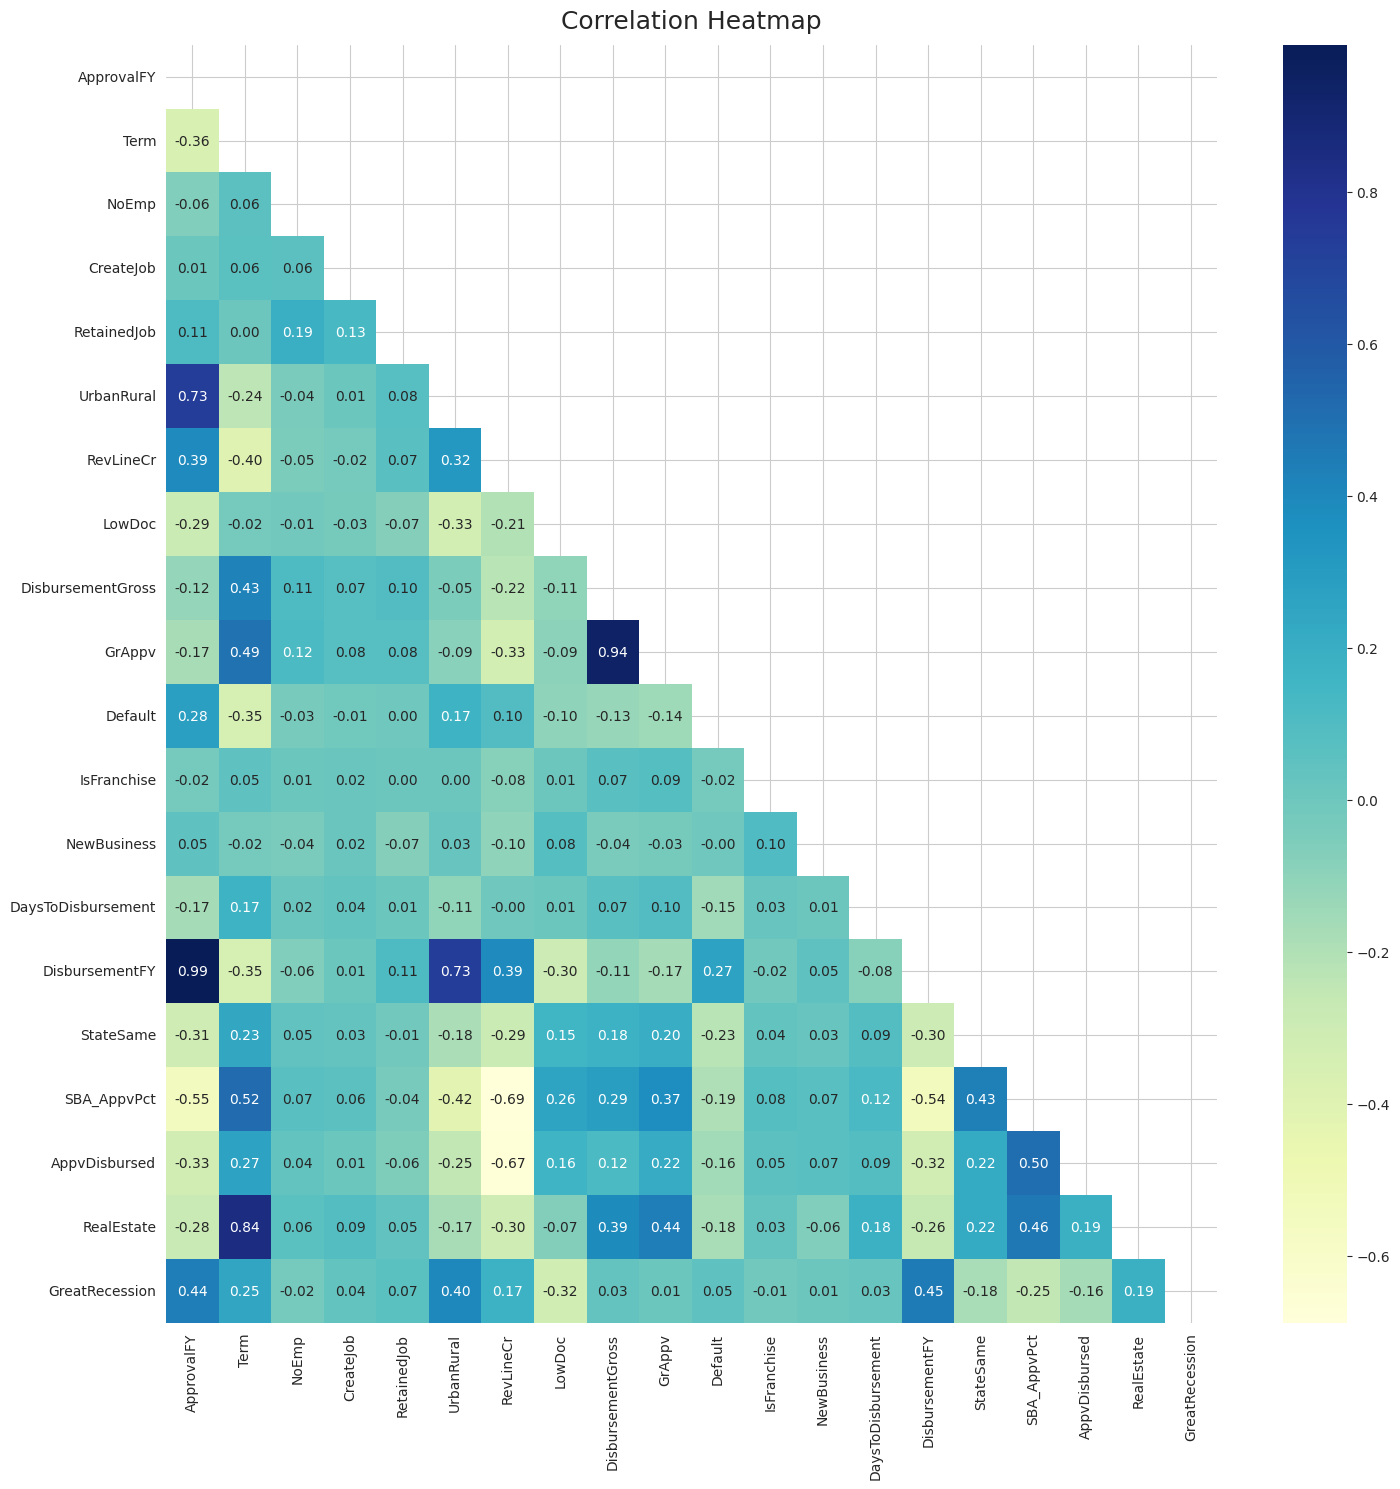

In [ ]:
plt.figure(figsize=(15, 15))

mask = np.triu(np.ones_like(df.corr(), dtype= bool))
heatmap = sns.heatmap(df.corr(), cmap='YlGnBu', mask=mask, annot=True, fmt='.2f')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

<Figure size 1500x1500 with 0 Axes>

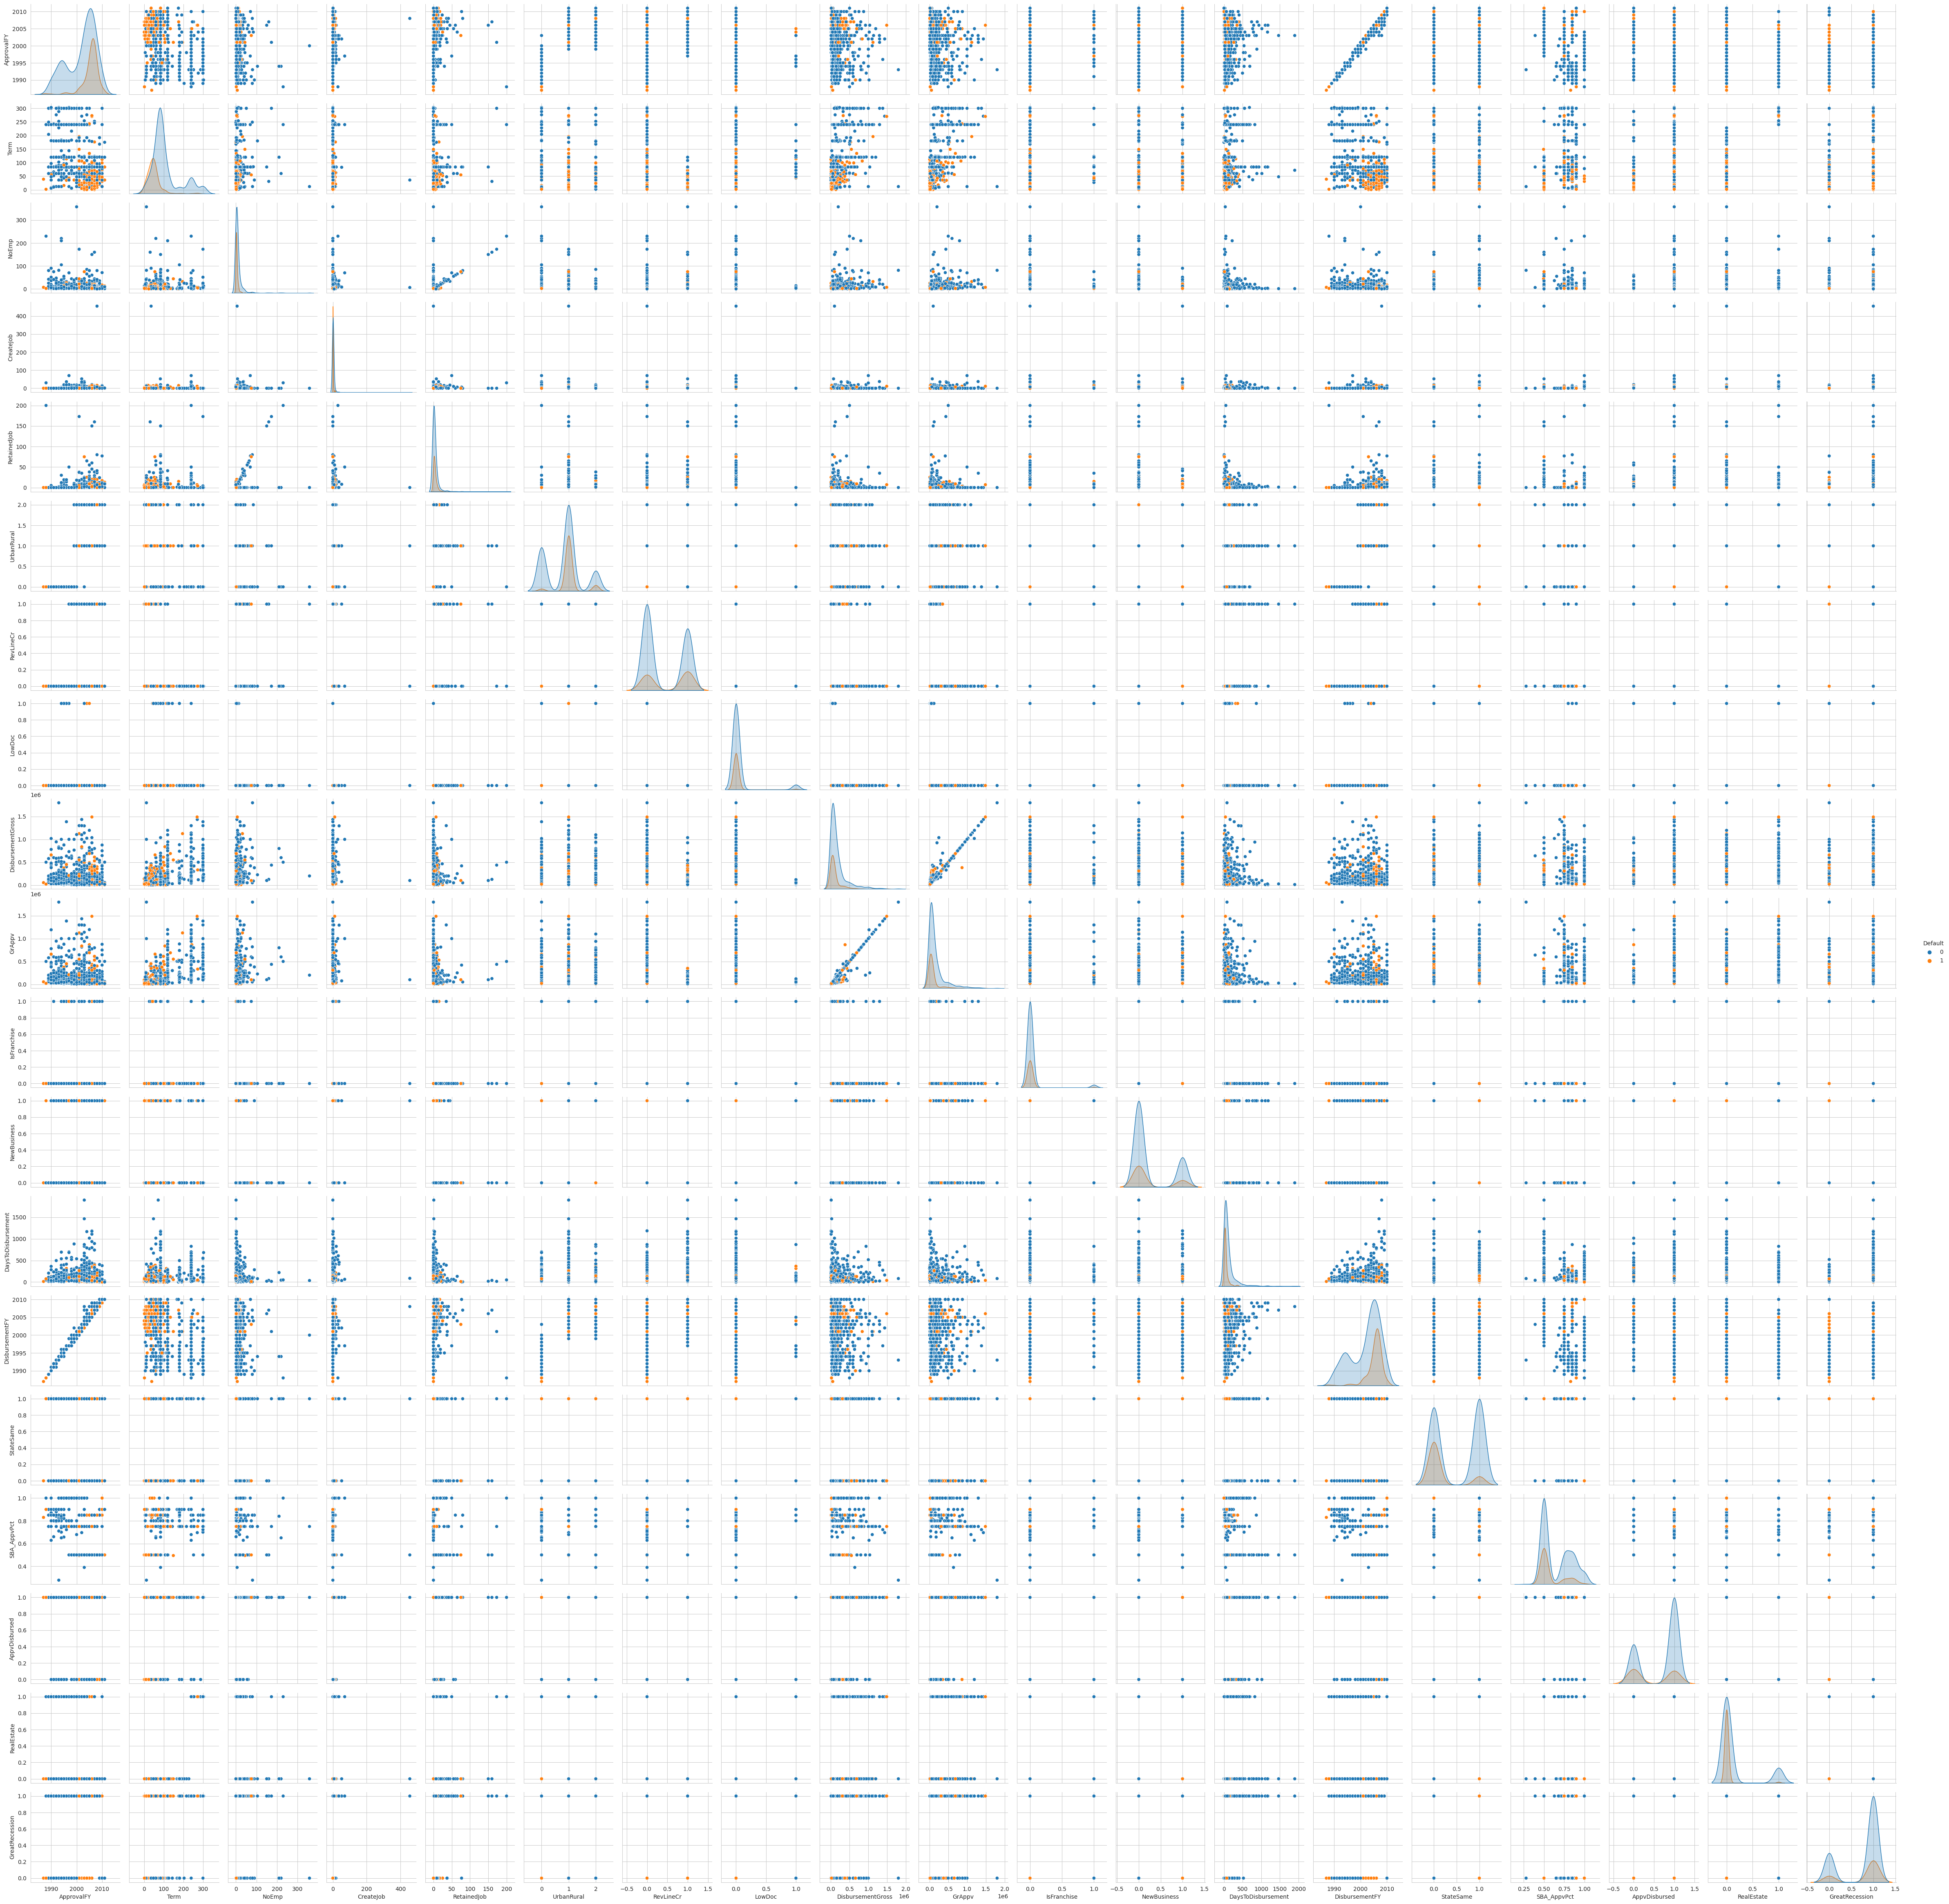

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df.drop(columns=['State', 'BankState', 'Industry']).sample(1000), diag_kind='kde', hue='Default')

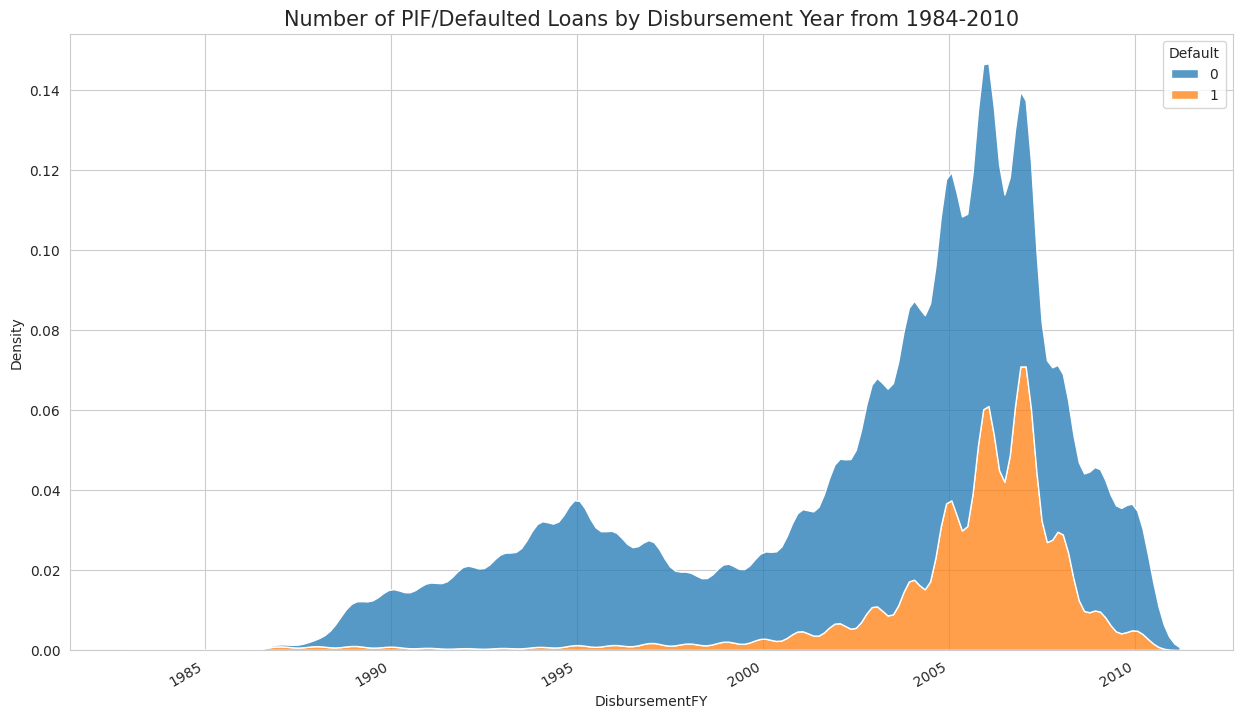

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15,8))
sns.kdeplot(x = df.DisbursementFY, hue=df.Default, multiple="stack", ax=ax)
ax.set_title('Number of PIF/Defaulted Loans by Disbursement Year from 1984-2010', fontsize=15)
plt.xticks(rotation = 30, fontsize = 10, horizontalalignment='right')
plt.show()

In [ ]:
def_ind = df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')
def_ind['Def_Percent'] = def_ind[1]/(def_ind[1] + def_ind[0])*100
def_ind['count'] = def_ind[1] + def_ind[0]

def_ind.sort_values('Def_Percent', ascending=False)

Default                                                 0      1  Def_Percent  \
Industry                                                                        
Finance / Insurance                                  3990   2094    34.418146   
Real Estate / Rental / Leasing                       6085   3098    33.736252   
Transportation / Warehousing                        10023   4431    30.655874   
Educational                                          2754   1070    27.981172   
Accomodation / Food Services                        23959   8388    25.931307   
Information                                          5228   1830    25.928025   
Construction                                        35046  12054    25.592357   
Administrative & Support / Waste Management / R...  15789   5429    25.586766   
Retail trade                                        59568  19058    24.238801   
Arts / Entertainment / Recreation                    6980   1920    21.573034   
Other Services (except public admin)                34221   9352    21.462832   
Wholesale trade                                     26252   7020    21.098822   
Proffesional / Scientific / Tech.Service            37310   9808    20.815824   
Management of Companies and Enterprises                90     23    20.353982   
Utilities                                             334     79    19.128329   
Manufacturing                                       36489   7282    16.636586   
Public Administration                                 151     29    16.111111   
Health Care / Social Assistance                     29240   3573    10.888977   
Mining / Quarrying / Oil&Gas Extraction              1139    117     9.315287   
Agriculture / Forestry / Fishing / Hunting           6544    657     9.123733   

Default                                             count  
Industry                                                   
Finance / Insurance                                  6084  
Real Estate / Rental / Leasing                       9183  
Transportation / Warehousing                        14454  
Educational                                          3824  
Accomodation / Food Services                        32347  
Information                                          7058  
Construction                                        47100  
Administrative & Support / Waste Management / R...  21218  
Retail trade                                        78626  
Arts / Entertainment / Recreation                    8900  
Other Services (except public admin)                43573  
Wholesale trade                                     33272  
Proffesional / Scientific / Tech.Service            47118  
Management of Companies and Enterprises               113  
Utilities                                             413  
Manufacturing                                       43771  
Public Administration                                 180  
Health Care / Social Assistance                     32813  
Mining / Quarrying / Oil&Gas Extraction              1256  
Agriculture / Forestry / Fishing / Hunting           7201

In [ ]:
def_state = df.groupby(['State', 'Default'])['State'].count().unstack('Default')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])*100
def_state['count'] = def_state[1] + def_state[0]

def_state.sort_values('Def_Percent', ascending=False)

Default      0      1  Def_Percent  count
State                                    
FL       14830   7588    33.847801  22418
AZ        5124   2474    32.561200   7598
NV        2690   1239    31.534742   3929
GA        7088   3142    30.713587  10230
MI        7982   3287    29.168515  11269
NJ        8223   3241    28.271110  11464
IL       11514   4506    28.127341  16020
CA       43028  16143    27.281946  59171
NY       24850   8239    24.899513  33089
SC        1926    616    24.232887   2542
CO        7449   2350    23.982039   9799
UT        8579   2609    23.319628  11188
DE         841    246    22.631095   1087
NC        4929   1425    22.426818   6354
TN        3481   1003    22.368421   4484
VA        4870   1374    22.005125   6244
MD        5085   1434    21.997239   6519
DC         567    157    21.685083    724
TX       22776   6208    21.418714  28984
KY        2962    789    21.034391   3751
IN        5907   1524    20.508680   7431
OH       14161   3592    20.233200  17753
AL        3197    805    20.114943   4002
OR        4523   1137    20.088339   5660
LA        3229    775    19.355644   4004
WA        9030   2075    18.685277  11105
HI        1165    264    18.474458   1429
ID        4054    886    17.935223   4940
AR        2420    528    17.910448   2948
MO        7682   1637    17.566262   9319
PA       14965   3147    17.375221  18112
CT        5331   1065    16.651032   6396
OK        3848    765    16.583568   4613
MA       11823   2289    16.220238  14112
MN        9192   1688    15.514706  10880
MS        3759    678    15.280595   4437
WV        1188    212    15.142857   1400
RI        4230    730    14.717742   4960
WI        8603   1465    14.551053  10068
NH        5971    922    13.375889   6893
KS        4276    633    12.894683   4909
NM        2415    321    11.732456   2736
ME        2508    317    11.221239   2825
IA        4605    568    10.980089   5173
NE        2336    285    10.873712   2621
AK         980     95     8.837209   1075
VT        2223    199     8.216350   2422
SD        1761    133     7.022175   1894
ND        2322    174     6.971154   2496
MT        3538    264     6.943714   3802
WY        1156     69     5.632653   1225

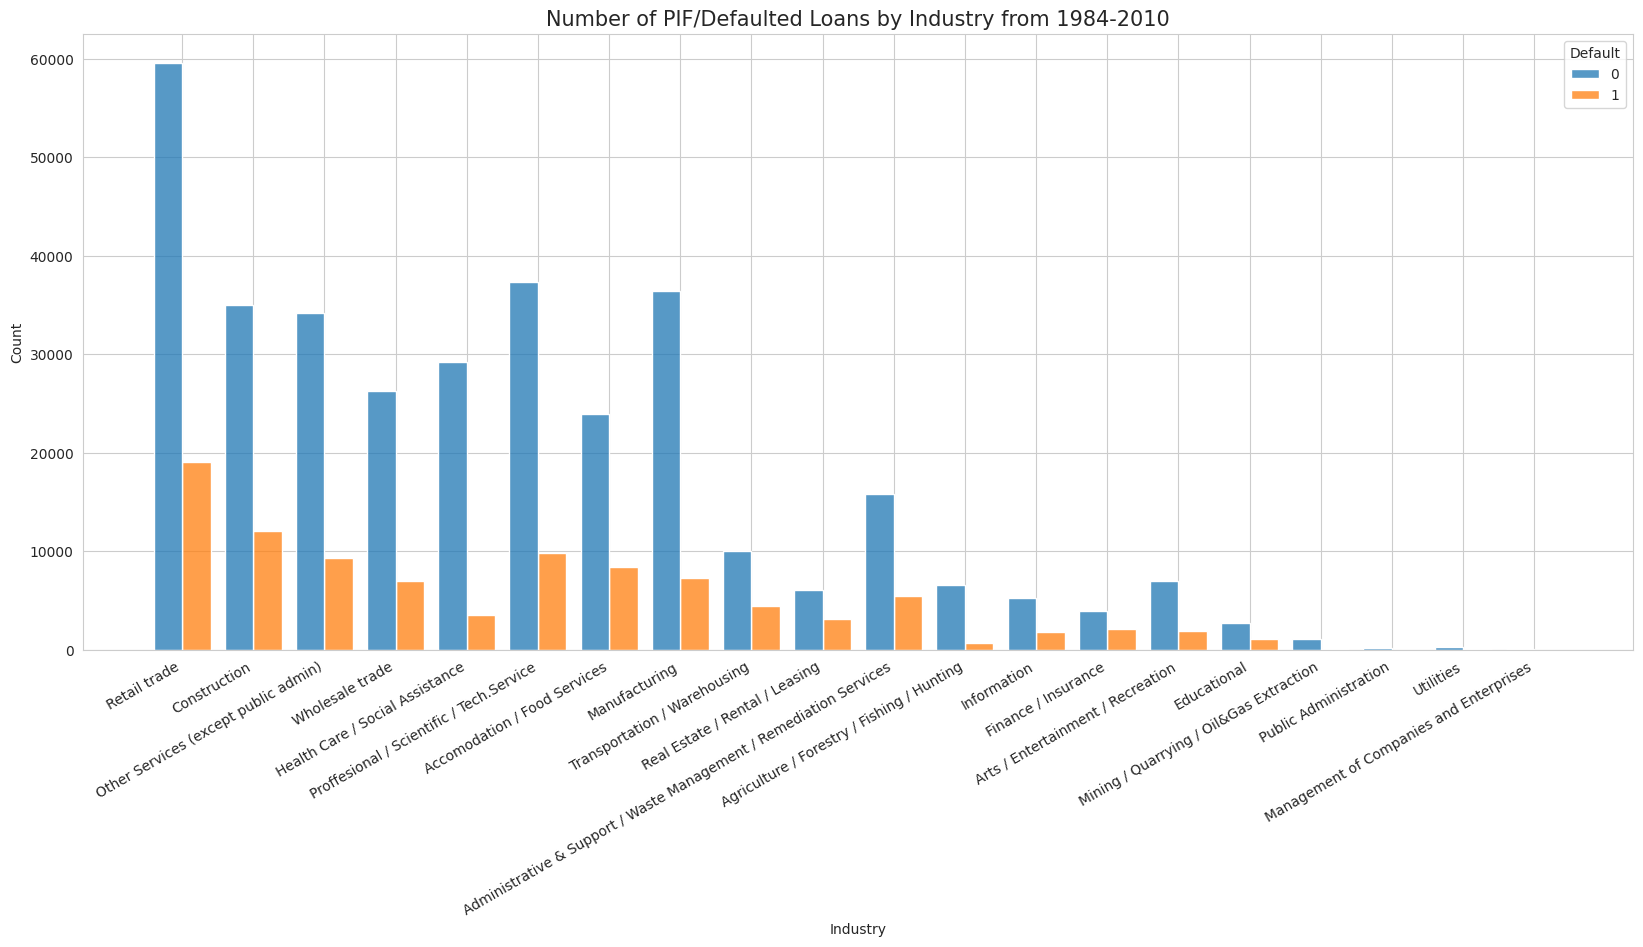

In [ ]:
df_a = df.sort_values('Default', ascending = True)

fig, ax = plt.subplots(1, 1, figsize = (20,8))
sns.histplot(data=df_a, x="Industry", hue="Default", multiple="dodge", shrink=.8, ax=ax)
ax.set_title('Number of PIF/Defaulted Loans by Industry from 1984-2010', fontsize=15)
plt.xticks(rotation = 30, fontsize = 10, ha='right')
plt.show()

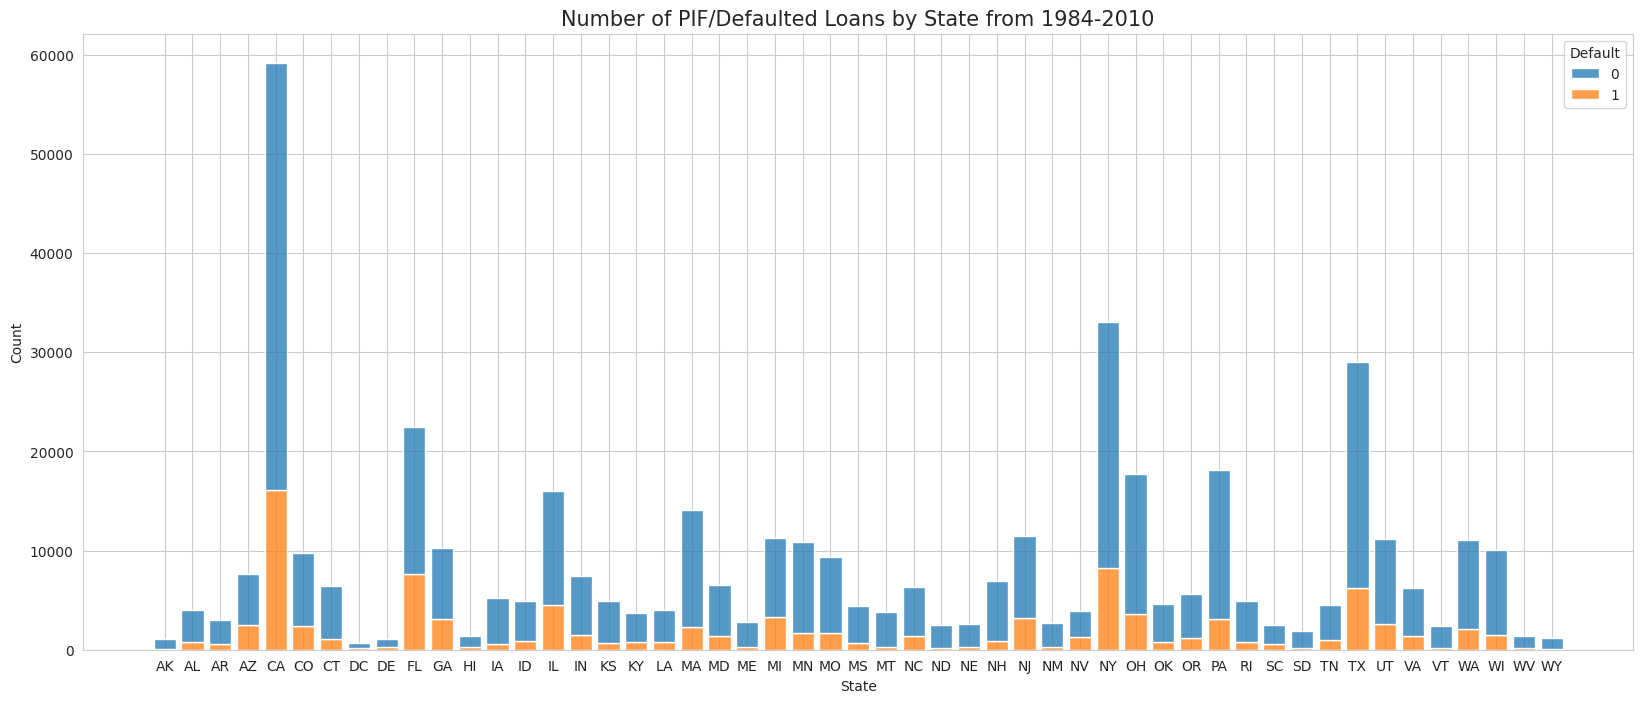

In [ ]:
df_a = df.sort_values('State', ascending = True)

fig, ax = plt.subplots(1, 1, figsize = (20,8))
sns.histplot(data=df_a, x="State", hue="Default", multiple="stack", shrink=.8, ax=ax)
ax.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
# plt.xticks(rotation = 90, fontsize = 10, ha='right')
plt.show()

<ipython-input-83-38e3217dc476>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending = False)
<ipython-input-83-38e3217dc476>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)
<ipython-input-83-38e3217dc476>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_industrySum.index, rotation=30, ha='right', fontsize=8)
<ipython-input-83-38e3217dc476>:19: UserWarning: FixedFormatter should only be use

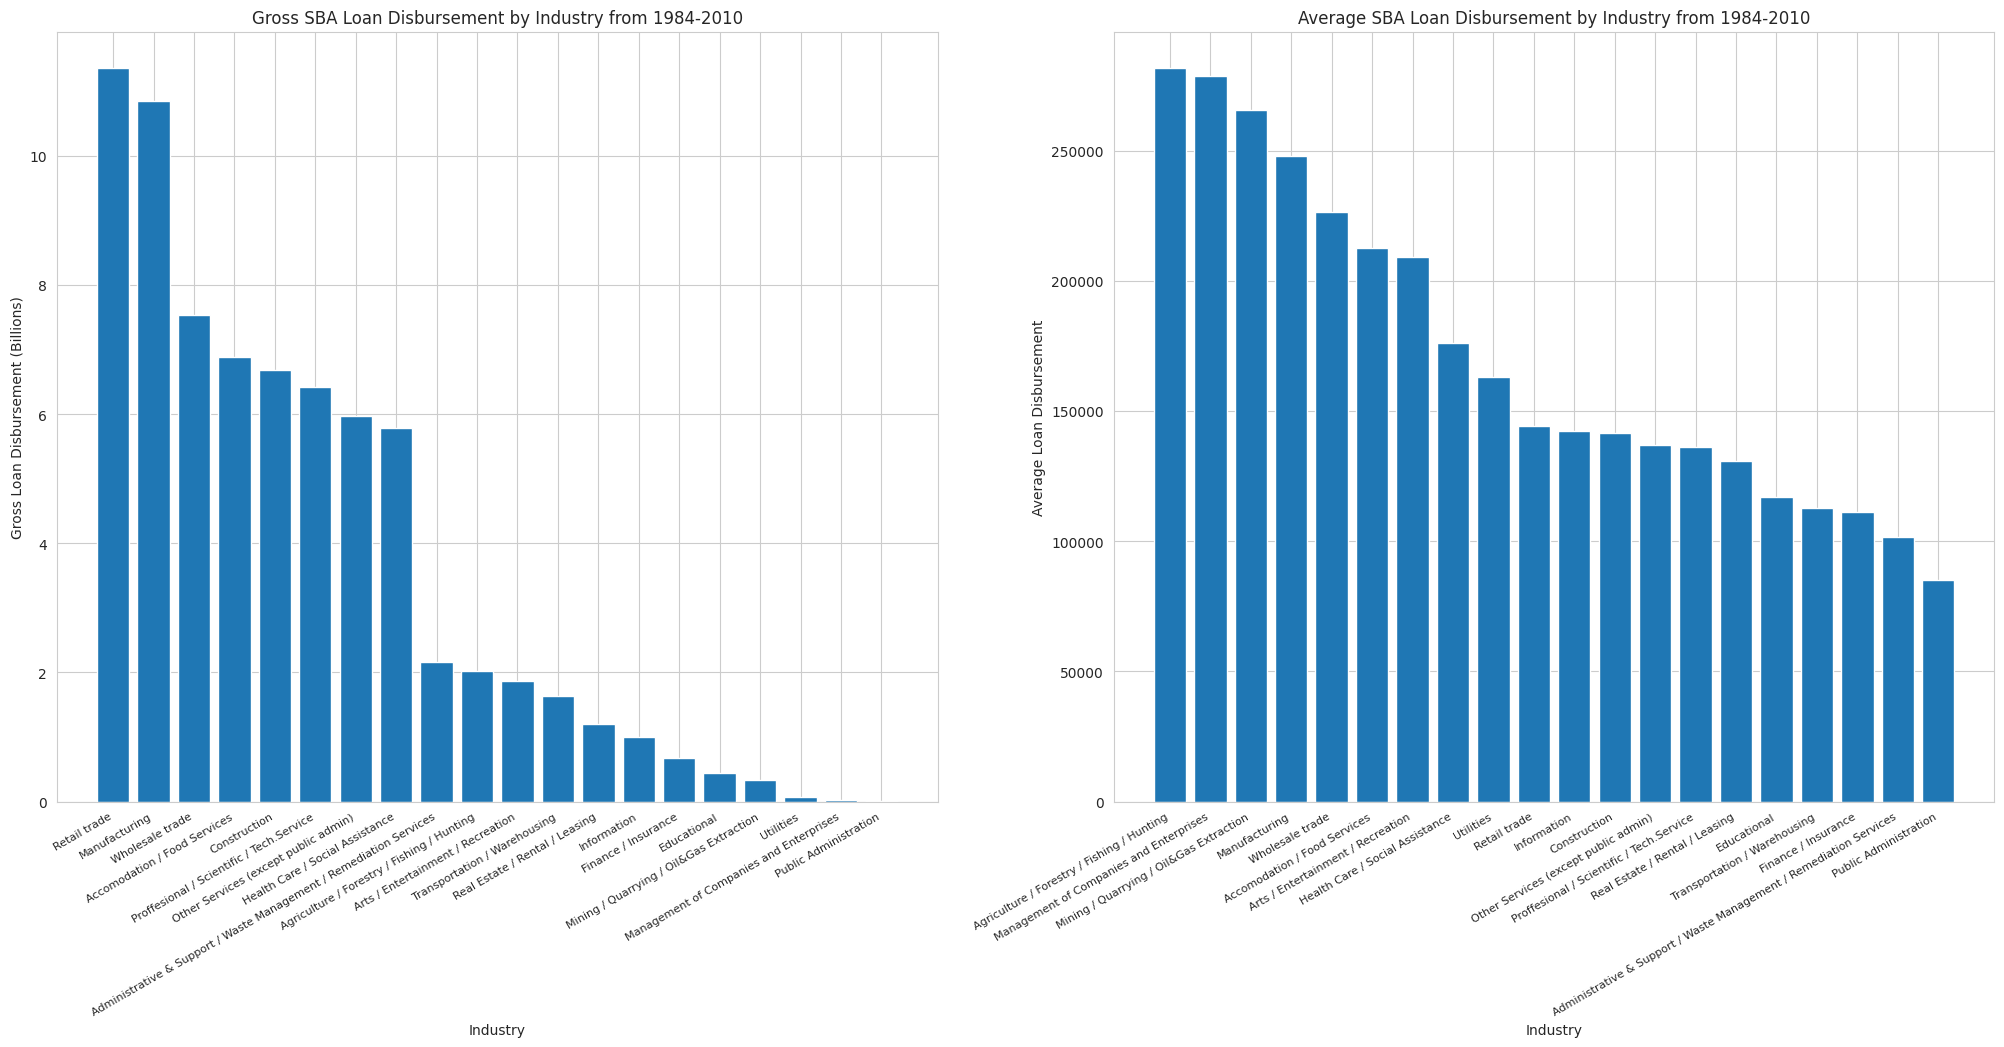

In [ ]:
industry_group = df.groupby(['Industry'])

df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending = False)
df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)

fig = plt.figure(figsize=(25,10))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.bar(df_industrySum.index, df_industrySum['DisbursementGross'] / 1000000000)
ax1.set_xticklabels(df_industrySum.index, rotation=30, ha='right', fontsize=8)

ax1.set_title('Gross SBA Loan Disbursement by Industry from 1984-2010', fontsize=12)
ax1.set_xlabel('Industry', fontsize = 10)
ax1.set_ylabel('Gross Loan Disbursement (Billions)', fontsize = 10)

ax2.bar(df_industryAve.index, df_industryAve['DisbursementGross'])
ax2.set_xticklabels(df_industryAve.index, rotation=30, ha='right', fontsize=8)

ax2.set_title('Average SBA Loan Disbursement by Industry from 1984-2010', fontsize=12)
ax2.set_xlabel('Industry',  fontsize = 10)
ax2.set_ylabel('Average Loan Disbursement',  fontsize = 10)

plt.show()

In [ ]:
# split dataset into features (X) and target (y)
X = df.drop(columns=['Default', 'State', 'BankState', 'Industry'])
y = df['Default']

# perform ANOVA feature selection
f_scores, p_values = f_classif(X, y)

# create a dataframe to store feature names, f-scores, and p-values
anova_results = pd.DataFrame({'Features': X.columns, 'F-Scores': f_scores, 'P-Values': p_values})

# sort the dataframe by descending f-scores
anova_results = anova_results.sort_values(by='F-Scores', ascending=False, ignore_index=True)

# print the feature scores
anova_results

Features      F-Scores       P-Values
0                 Term  60854.597684   0.000000e+00
1           ApprovalFY  37530.111791   0.000000e+00
2       DisbursementFY  34266.223375   0.000000e+00
3            StateSame  23509.215668   0.000000e+00
4          SBA_AppvPct  16871.299177   0.000000e+00
5           RealEstate  14295.041336   0.000000e+00
6           UrbanRural  13195.825578   0.000000e+00
7        AppvDisbursed  11371.546719   0.000000e+00
8   DaysToDisbursement  10315.329966   0.000000e+00
9               GrAppv   9209.297305   0.000000e+00
10   DisbursementGross   7495.377035   0.000000e+00
11              LowDoc   4651.359142   0.000000e+00
12           RevLineCr   4327.462606   0.000000e+00
13      GreatRecession    993.008773  1.042764e-217
14               NoEmp    504.562050  1.118421e-111
15         IsFranchise    261.060863   1.047785e-58
16           CreateJob     18.870485   1.399319e-05
17         NewBusiness      0.820101   3.651512e-01
18         RetainedJob      0.382258   5.363974e-01

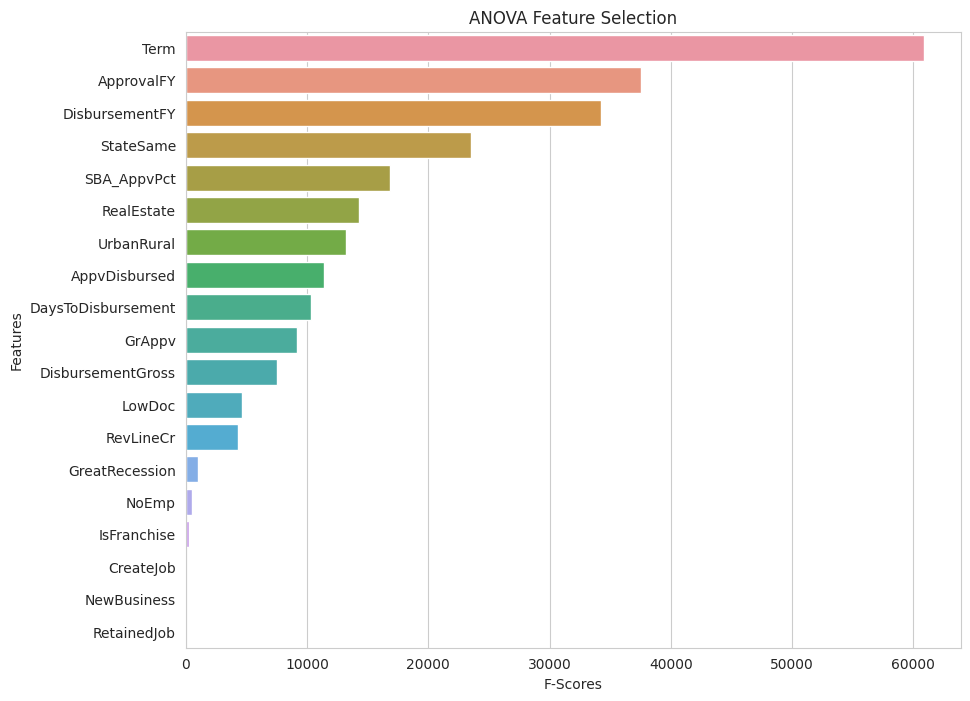

In [ ]:
# create horizontal bar plot for f-scores
plt.figure(figsize=(10, 8))
sns.barplot(x='F-Scores', y='Features', data=anova_results, orient='h')
plt.title('ANOVA Feature Selection')
plt.xlabel('F-Scores')
plt.ylabel('Features')
plt.show()

In [ ]:
# create a SelectKBest object
selector = SelectKBest(f_classif, k=5)

# fit selector to data
selector.fit(X, y)

# get selected features
selected_features = X.columns[selector.get_support()]

# display selected features
print('Selected features:', list(selected_features))

Selected features: ['ApprovalFY', 'Term', 'DisbursementFY', 'StateSame', 'SBA_AppvPct']


In [ ]:
df.dtypes

State                  object
BankState              object
ApprovalFY              int16
Term                    int64
NoEmp                   int64
CreateJob               int64
RetainedJob             int64
UrbanRural               int8
RevLineCr               int64
LowDoc                  int64
DisbursementGross     float64
GrAppv                float64
Industry               object
Default                 int64
IsFranchise              int8
NewBusiness              int8
DaysToDisbursement      int64
DisbursementFY          int64
StateSame               int64
SBA_AppvPct           float64
AppvDisbursed           int64
RealEstate              int64
GreatRecession          int64
dtype: object

In [ ]:
# split dataset into features (X) and target (y)
X = df[['Industry',	'RevLineCr', 'LowDoc', 'NewBusiness', 'IsFranchise', 'RealEstate', 'GreatRecession']]
y = df['Default']

# convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, columns=X.columns)

# perform Chi2 feature selection
chi2_scores, p_values = chi2(X, y)

# create a dataframe to store feature names, chi2_scores, and p-values
chi2_results = pd.DataFrame({'Features': X.columns, 'chi2_scores': chi2_scores, 'P-Values': p_values})

# sort the dataframe by descending chi2_scores
chi2_results = chi2_results.sort_values(by='chi2_scores', ascending=False)

# print the feature scores
chi2_results = chi2_results.reset_index(drop=True)

# Only RevLineCr_Y, LowDoc_Y, RevLineCr_Y, LowDoc_N
chi2_results = chi2_results.drop(chi2_results.index[32:])
chi2_results = chi2_results.drop([0, 4, 14, 19, 22, 23, 28, 30]).reset_index(drop=True)
chi2_results

Features  chi2_scores  \
0                                            LowDoc_1  4339.076938   
1                                         RevLineCr_1  2489.874688   
2            Industry_Health Care / Social Assistance  2427.744019   
3                                        RealEstate_0  1550.112888   
4                              Industry_Manufacturing   782.298377   
5                                    GreatRecession_0   727.159549   
6   Industry_Agriculture / Forestry / Fishing / Hu...   712.194244   
7             Industry_Real Estate / Rental / Leasing   708.780732   
8               Industry_Transportation / Warehousing   599.690532   
9                        Industry_Finance / Insurance   526.700006   
10                              Industry_Construction   315.426943   
11                                   GreatRecession_1   263.610108   
12              Industry_Accomodation / Food Services   261.963635   
13                                      IsFranchise_1   252.923705   
14                              Industry_Retail trade   190.799679   
15  Industry_Administrative & Support / Waste Mana...   141.629306   
16                               Industry_Educational    74.226714   
17                               Industry_Information    57.059228   
18      Industry_Other Services (except public admin)    13.410178   
19                                      IsFranchise_0     7.983018   
20                     Industry_Public Administration     3.854448   
21                                 Industry_Utilities     2.244729   
22                                      NewBusiness_1     0.603727   
23                                      NewBusiness_0     0.216376   

         P-Values  
0    0.000000e+00  
1    0.000000e+00  
2    0.000000e+00  
3    0.000000e+00  
4   3.808608e-172  
5   3.713985e-160  
6   6.668344e-157  
7   3.683776e-156  
8   1.954838e-132  
9   1.475314e-116  
10   1.435602e-70  
11   2.802976e-59  
12   6.404670e-59  
13   5.984943e-57  
14   2.127063e-43  
15   1.172024e-32  
16   6.964146e-18  
17   4.228825e-14  
18   2.502627e-04  
19   4.721815e-03  
20   4.961424e-02  
21   1.340704e-01  
22   4.371596e-01  
23   6.418151e-01

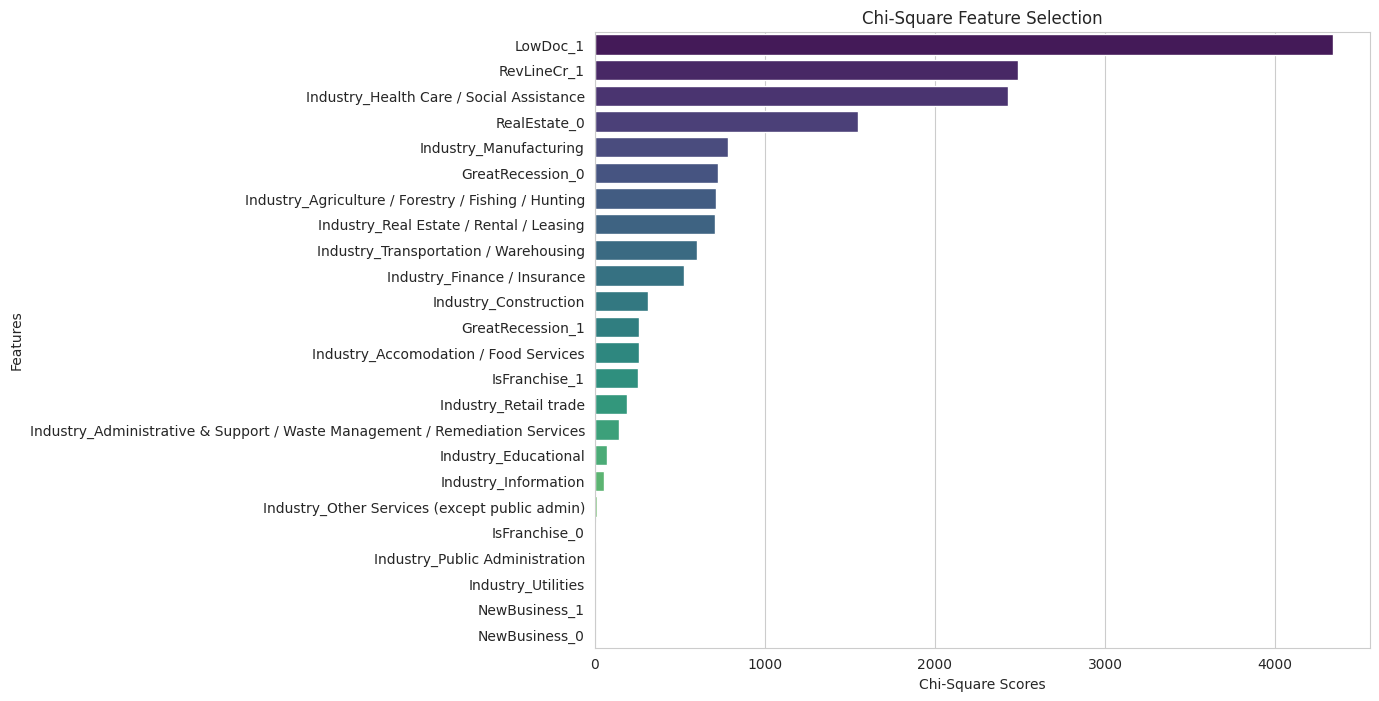

In [ ]:
# create horizontal bar plot for chi-square scores
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='chi2_scores', y='Features', data=chi2_results, palette='viridis')

# set title and labels
ax.set_title('Chi-Square Feature Selection')
ax.set_xlabel('Chi-Square Scores')
ax.set_ylabel('Features')

# show the plot
plt.show()

In [ ]:
# create a SelectKBest object
selector = SelectKBest(chi2, k=5)

# fit selector to data
selector.fit(X, y)

# get selected features
selected_features = X.columns[selector.get_support()]

# display selected features
print('Selected features:', list(selected_features))

Selected features: ['Industry_Health Care / Social Assistance', 'RevLineCr_0', 'RevLineCr_1', 'LowDoc_1', 'RealEstate_1']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438504 entries, 0 to 899161
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               438504 non-null  object 
 1   BankState           438504 non-null  object 
 2   ApprovalFY          438504 non-null  int16  
 3   Term                438504 non-null  int64  
 4   NoEmp               438504 non-null  int64  
 5   CreateJob           438504 non-null  int64  
 6   RetainedJob         438504 non-null  int64  
 7   UrbanRural          438504 non-null  int8   
 8   RevLineCr           438504 non-null  int64  
 9   LowDoc              438504 non-null  int64  
 10  DisbursementGross   438504 non-null  float64
 11  GrAppv              438504 non-null  float64
 12  Industry            438504 non-null  object 
 13  Default             438504 non-null  int64  
 14  IsFranchise         438504 non-null  int8   
 15  NewBusiness         438504 non-nul